# Resolución Trabajo Práctico 01

## Integrantes

- Gaspar Acevedo Zain

## Carga del dataset

### Imports y carga del dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import entropy

In [2]:
df_sneep_2023_csv = pd.read_csv("../dataset/sneep-2023.csv")

In [3]:
# Configuramos el output display con 100 filas
pd.options.display.max_rows = 100

## Helper functions

In [29]:
# Devuelve datos relativos a columnas numéricas, tales como media, skewness, kurtosis, entre otros
def get_metrics_from_numeric_column(data, column):
    skewness = (data[column]).skew()
    kurtosis = (data[column]).kurt()
    media = (data[column]).mean()
    moda = (data[column]).mode()[0]
    mediana = (data[column]).median()
    var = (data[column]).var()
    std = (data[column]).std()
    min = (data[column]).min()
    max = (data[column]).max()

    return media, moda, mediana, min, max, var, std, skewness, kurtosis

In [30]:
# Devuelve métricas relacionadas al rango Intercuartil
def get_iqr_metrics(data, column):
    Q1 = data[column].quantile(0.25)
    Q2 = data[column].quantile(0.50)
    Q3 = data[column].quantile(0.75)

    IQR = Q3 - Q1
    min_iqr = Q1 - 1.5*IQR
    max_iqr = Q3 + 1.5*IQR

    return Q1, Q2, Q3, IQR, min_iqr, max_iqr

In [98]:
# defino un color default
default_green_color = "#1F968BFF"

# Código provisto por la materia
# Función para graficar Histogramas, junto con skewness, kurtosis, media, varianza, y/o desvío estandar
def plot_histograma(data, column, figsize=(6, 3), bins=15, kde=True, mvd=True, snk=False, color=default_green_color):
    media, moda, mediana, min, max, var, std, skewness, kurtosis = get_metrics_from_numeric_column(data, column)
    
    plt.figure(figsize=figsize)
    plt.grid(axis='y')
    sns.histplot(data[column], bins=bins, kde=kde, color=color)
    if snk:
        plt.figtext(0.7, 0.8, f'Asimetría: {skewness:.2f}', fontsize=10, color='blue')
        plt.figtext(0.715, 0.73, f'Curtosis: {kurtosis:.2f}', fontsize=10, color='blue')
    plt.axvline(media, color='red', linestyle='--', label='Media')
    plt.axvline(moda, color='purple', linestyle='--', label='Moda')
    plt.axvline(mediana, color='green', linestyle='--', label='Mediana')
    if mvd:
        plt.figtext(0.15, 0.8, f'Media: {media:.2f}', fontsize=10, color='red')
        plt.figtext(0.15, 0.73, f'Moda: {moda:.2f}', fontsize=10, color='purple')
        plt.figtext(0.15, 0.66, f'Mediana: {mediana:.2f}', fontsize=10, color='green')
        plt.figtext(0.15, 0.59, f'Var: {var:.2f}', fontsize=10, color='black')
        plt.figtext(0.15, 0.52, f'Std: {std:.2f}', fontsize=10, color='black')
    plt.title(f'Variable: {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Frecuencia')
    plt.show()
    
    return

In [32]:
# Función para graficar un histograma, en función de los datos dados
def graficar_distribucion_histograma(data, col, titulo, xlabel, ylabel="Count", rotation=45):
    sns.countplot(x=col, data=data)
    plt.title(titulo)
    plt.xticks(rotation=rotation)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [33]:
# Función para graficar un crosstab, mediante un dataset, y dos columnas del mismo
def graficar_crosstab(data, col1, col2, titulo, xlabel, ylabel, figsize = (8,5), cmap="Blues", fmt='d', annotate=True):
    plt.figure(figsize=figsize)
    cross_tab = pd.crosstab(data[col1], data[col2])
    sns.heatmap(cross_tab, annot=annotate, fmt=fmt, cmap=cmap)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [34]:
# Función para graficar un boxplot, dados un dataset, una columna (numérica) y una columna categórica sobre la cual hacer una subdivisión
def graficar_boxplot(data, col, col_division, titulo, loc='upper right', figsize=(10,4)):
    plt.figure(figsize=figsize)
    sns.boxplot(data=data, y=col, hue=col_division)
    plt.legend(title=titulo, loc=loc)
    plt.show()

In [35]:
# Grafica la frecuencia relativa de una variable dada
def graficar_frecuencias_relativas(data, col, titulo, xlabel, ylabel, dropna=False, figsize=(9,4), palette="viridis", loc="lower right"):
    total = len(data)
    relative_freq = data[col].value_counts(dropna=dropna) / total

    # Graficar frecuencias relativas
    plt.figure(figsize=figsize)
    sns.barplot(x=relative_freq.values, hue=relative_freq.index, palette=palette)
    plt.legend(loc=loc)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [36]:
# Obtiene la entropía de Shannon de una columna dada.
def obtener_entropia_de_shannon(data, col, print_result = True):
    value_counts = data[col].value_counts()
    unique_values = data[col].nunique()

    entr = entropy(pk=value_counts)
    max_entr_posible = math.log2(unique_values)

    if print_result:
        print(f"""Variable \"{col}\"
          Entropía:             {entr}
          Max entropía posible: {max_entr_posible}""")
    
    return entr, max_entr_posible

In [37]:
# Esta función reemplaza los NA con el string "N/A"
fill_na_as_string_lambda = lambda col: col.fillna("N/A")

In [38]:
# Esta función permite agrupar un dataframe por columnas
# df: Dataframe sobre el cual se trabaja
# cols: columnas sobre las cuales se agruparán
# fn_to_apply: Función a aplicar al dataframe ANTES de agrupar. Puede ser, por ejemplo, para tratar nulos
def agrupar_por_columnas(df, cols = [], fn_to_apply = None):
    if fn_to_apply is not None:
        df = df.apply(fn_to_apply)
    
    if len(cols) > 0:
        df = df.groupby(cols).size()
    return df

In [39]:
# Array con valores para pasar a una función de agregación/agregado. Se utiliza en secciones posteriores
agg_mean_median_min_max_count = [('Media', 'mean'), ('Mediana', 'median'), ('Valor mínimo', 'min'), ('Valor máximo', 'max'), ('Cantidad', 'count')]

In [40]:
# Función que permite agrupar por columnas, y aplicar ciertas funciones de agregado sobre una columna extra
# df: Dataframe sobre el cual se trabaja
# cols: columnas sobre las cuales se agruparán
# fn_to_apply: Función a aplicar al dataframe ANTES de agrupar. Puede ser, por ejemplo, para tratar nulos
# info_from_col: columna sobre la cual queremos aplicar funciones de agregado
# agg: funciones de agregado/aggregation functions
def agrupar_por_columnas_info_aggregation(df, cols = [], fn_to_apply = None, info_from_col = None, agg = []):
    if fn_to_apply is not None:
        df = df.apply(fn_to_apply)
    
    if len(cols) > 0:
        df = df.groupby(cols)

    if info_from_col is not None:
        df = df[info_from_col]
    
    if len(agg) > 0:
        df = df.agg(agg)

    return df

## Paso 1 - Exploración y comprensión de columnas del dataset

El dataset elegido para realizar este trabajo es el de *SNEEP* o `Sistema Nacional de Estadísticas sobre Ejecución de la Pena`, específicamente, para el año 2023.

En una primera revisión, se encontró que el mismo tiene *111967* filas y *86* columnas. <br/>
Al analizar las columnas, se encontró que en la mayoría de los casos se presentan el ID y la descripción de un atributo en particular. <br/>
Por ejemplo, se tienen las columnas `tuvo_reduccion_pena_id` y `tuvo_reduccion_pena_descripcion`, que corresponden al ID y la descripción de las observaciones correspondientes a la *reducción de pena* de cada registro. <br/>
Específicamente, hay `36` columnas que corresponden a `IDs`.

Para comenzar a analizar en "profundidad" al dataset, se decidió hacer una división entre columnas IDs y columnas con descripción.

A continuación, se detallan los resultados encontrados para las columnas que no corresponden a descripciones.

| Nombre de columna | Tipo de variable | Subtipo de variable | Cantidad de datos únicos | Cantidad de *NA* |
| --- | --- | --- | --- | --- |
| censo_anio                                        | Categórica | Continua | 1 (el año 2023) | 0 |
| provincia_descripcion								| Categórica | Nominal |   24 |      0 |
| establecimiento_descripcion						| Categórica | Nominal |  325 |   3012 |
| edad												| Cuantitativa | Continua |   75 |      0 |
| genero_descripcion								| Categórica | Nominal |    5 |      0 |
| nacionalidad_descripcion							| Categórica | Nominal |   15 |    721 |
| estado_civil_descripcion							| Categórica | Nominal |    6 |   2891 |
| nivel_instruccion_descripcion						| Categórica | Ordinal |    9 |   7737 |
| ultima_situacion_laboral_descripcion				| Categórica | Nominal |    3 |    889 |
| capacitacion_laboral_al_ingresar_descripcion		| Categórica | Nominal |    3 |   4205 |
| ultimo_lugar_residencia_descripcion				| Categórica | Nominal |    2 |     65 |
| ultima_provincia_residencia_descripcion			| Categórica | Nominal |   24 |    591 |
| jurisdiccion_descripcion							| Categórica | Nominal |   26 |     12 |
| situacion_legal_descripcion						| Categórica | Nominal |    4 |      0 |
| fecha_detencion									| Cuantitativa | Continua | 6348 |   4807 |
| fecha_condenado									| Cuantitativa | Continua | 4879 |  50524 |
| establecimiento_procedencia_descripcion			| Categórica | Nominal |    4 |   1900 |
| delito1_descripcion								| Categórica | Nominal |   30 |    590 |
| delito2_descripcion								| Categórica | Nominal |   30 |  87909 |
| delito3_descripcion								| Categórica | Nominal |   29 | 105385 |
| delito4_descripcion								| Categórica | Nominal |   25 | 110104 |
| delito5_descripcion								| Categórica | Nominal |   21 | 111446 |
| horas_trabajo_remunerado_descripcion				| Categórica | Ordinal |    5 |    423 |
| participacion_programa_laboral					| Categórica | Ordinal |    2 |   5174 |
| participacion_programa_educativo_descripcion		| Categórica | Nominal |    6 |   4179 |
| participacion_actividades_deportivas				| Categórica | Nominal |    2 |   2227 |
| recibio_atencion_medica_ult_anio					| Categórica | Nominal |   12 |      0 |
| recibio_atencion_medica_ult_anio_descripcion		| Categórica | Nominal |   11 |   4819 |
| recibio_visitas_ultimo_anio						| Categórica | Nominal |    2 |   2812 |
| participo_alteracion_orden_ult_anio_descripcion	| Categórica | Nominal |    5 |   1838 |
| tipo_infraccion_disciplinaria_descripcion			| Categórica | Nominal |    4 |   1589 |
| sancion_aplicada_descripcion						| Categórica | Nominal |    9 |  95702 |
| calificacion_conducta_descripcion					| Categórica | Nominal |    7 |   3737 |
| tentativa_fugas_evasiones_descripcion				| Categórica | Nominal |    3 |    227 |
| tentativa_suicidio								| Categórica | Nominal |    3 |      0 |
| fue_lesionado_descripcion							| Categórica | Nominal |    4 |    665 |
| duracion_condena_anios							| Cuantitativa | Continua |   48 |      0 |
| duracion_condena_meses							| Cuantitativa | Continua |   40 |      0 |
| duracion_condena_rango							| Categórica | Ordinal |    9 |      0 |
| tipo_condena										| Categórica | Nominal |    2 |  46325 |
| es_reincidente_descripcion						| Categórica | Nominal |    3 |  48931 |
| tiene_periodo_progresividad_descripcion			| Categórica | Nominal |    6 |  47173 |
| reparticion_descripcion							| Categórica | Nominal |    2 |   3012 |
| tuvo_salidas_transitorias_descripcion				| Categórica | Nominal |    4 |  48567 |
| incorporado_reg_semi_libertad_descripcion			| Categórica | Nominal |    4 |  46364 |
| participa_programa_pre_libertad					| Categórica | Nominal |    2 |  47713 |
| participa_programa_prision_discontinua_descripcion| Categórica | Nominal |    4 |  48167 |
| participa_programa_semi_detencion_descripcion		| Categórica | Nominal |    4 |  47465 |
| tuvo_reduccion_pena_descripcion					| Categórica | Nominal |    4 |  48275 |
| mujer_tiene_hijos_intramuro						| Categórica | Nominal |    2 | 107325 |

### Paso 1.1 - Análisis de las columnas del dataset

In [4]:
# Mostramos las 5 primeras filas
df_sneep_2023_csv.head()

,censo_anio,provincia_sneep_id,provincia_descripcion,establecimiento_id,establecimiento_descripcion,edad,genero_id,genero_descripcion,nacionalidad_id,nacionalidad_descripcion,...,participa_programa_pre_libertad,participa_programa_prision_discontinua_id,participa_programa_prision_discontinua_descripcion,participa_programa_semi_detencion_id,participa_programa_semi_detencion_descripcion,tuvo_reduccion_pena_id,tuvo_reduccion_pena_descripcion,mujer_tiene_hijos_intramuro,provincia_id,ultima_provincia_residencia_id
0,2023,23,Tucumán,163,UNIDAD Nº 3 - ENCAUSADOS CONCEPCIÓN,57,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,90,90.0
1,2023,23,Tucumán,163,UNIDAD Nº 3 - ENCAUSADOS CONCEPCIÓN,34,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,90,90.0
2,2023,1,Buenos Aires,162,UNIDAD 30 - GENERAL ALVEAR,42,1,Varón,1,Argentina,...,NaN,0,NaN,0,NaN,0,NaN,NaN,6,6.0
3,2023,1,Buenos Aires,162,UNIDAD 30 - GENERAL ALVEAR,36,1,Varón,1,Argentina,...,NaN,0,NaN,0,NaN,0,NaN,NaN,6,86.0
4,2023,17,San Juan,48,"SERVICIO PENITENCIARIO PROVINCIAL ""CRIO. GRAL....",25,1,Varón,1,Argentina,...,0.0,1,No está incorporado/a,1,No tiene semidetención,4,No tuvo reducción de pena,NaN,70,70.0


In [5]:
df_sneep_2023_csv.shape

(111967, 86)

In [6]:
df_sneep_2023_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111967 entries, 0 to 111966
Data columns (total 86 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   censo_anio                                          111967 non-null  int64  
 1   provincia_sneep_id                                  111967 non-null  int64  
 2   provincia_descripcion                               111967 non-null  object 
 3   establecimiento_id                                  111967 non-null  int64  
 4   establecimiento_descripcion                         108955 non-null  object 
 5   edad                                                111967 non-null  int64  
 6   genero_id                                           111967 non-null  int64  
 7   genero_descripcion                                  111967 non-null  object 
 8   nacionalidad_id                                     111967 non-n

In [7]:
df_sneep_2023_csv.columns.tolist()

['censo_anio',
 'provincia_sneep_id',
 'provincia_descripcion',
 'establecimiento_id',
 'establecimiento_descripcion',
 'edad',
 'genero_id',
 'genero_descripcion',
 'nacionalidad_id',
 'nacionalidad_descripcion',
 'estado_civil_id',
 'estado_civil_descripcion',
 'nivel_instruccion_id',
 'nivel_instruccion_descripcion',
 'ultima_situacion_laboral_id',
 'ultima_situacion_laboral_descripcion',
 'capacitacion_laboral_al_ingresar_id',
 'capacitacion_laboral_al_ingresar_descripcion',
 'ultimo_lugar_residencia_id',
 'ultimo_lugar_residencia_descripcion',
 'ultima_provincia_residencia_sneep_id',
 'ultima_provincia_residencia_descripcion',
 'jurisdiccion_id',
 'jurisdiccion_descripcion',
 'situacion_legal_id',
 'situacion_legal_descripcion',
 'fecha_detencion',
 'fecha_condenado',
 'establecimiento_procedencia_id',
 'establecimiento_procedencia_descripcion',
 'delito1_id',
 'delito1_descripcion',
 'delito2_id',
 'delito2_descripcion',
 'delito3_id',
 'delito3_descripcion',
 'delito4_id',
 'del

In [8]:
# Mostramos la cantidad de valores únicos por columna
df_sneep_2023_csv.nunique()

censo_anio                                               1
provincia_sneep_id                                      24
provincia_descripcion                                   24
establecimiento_id                                     336
establecimiento_descripcion                            325
edad                                                    75
genero_id                                                5
genero_descripcion                                       5
nacionalidad_id                                         16
nacionalidad_descripcion                                15
estado_civil_id                                          7
estado_civil_descripcion                                 6
nivel_instruccion_id                                    10
nivel_instruccion_descripcion                            9
ultima_situacion_laboral_id                              4
ultima_situacion_laboral_descripcion                     3
capacitacion_laboral_al_ingresar_id                     

In [9]:
# Identificamos las columnas que corresponden a IDs
columnas_id = []

for column_name in df_sneep_2023_csv.columns:
    # Agregamos aquellas que tienen sufijo "_id"
    "_id" in column_name and columnas_id.append(column_name)

In [10]:
# Validamos que todas las columnas con sufijo "_id" tengan una columna equivalente con sufijo "_descripcion"
columnas_id_sin_descripcion = []

for column_name in columnas_id:
    not (column_name.replace("_id", "_descripcion") in df_sneep_2023_csv.columns) and columnas_id_sin_descripcion.append(column_name)

In [11]:
columnas_id_provincias = []
# Obtenemos las columnas que se refieran a las provincias
for column_name in df_sneep_2023_csv.columns:
    # Agregamos aquellas que tienen sufijo "_id"
    "provincia" in column_name and columnas_id_provincias.append(column_name)

In [12]:
# Generamos una nueva lista, en donde sacamos las columnas que refieren a ID de provincias del resto que refiere a IDs
columnas_id_no_provincias = list(set(columnas_id) - set(columnas_id_provincias))

In [13]:
# De manera similar, generamos una lista solamente con las columas ID
solo_columnas_id = list(set(df_sneep_2023_csv.columns.tolist()) - set(columnas_id))

### Paso 1.2 - Creación de nuevos datasets con las columnas IDs y descripción por separado

In [14]:
# Se crea un dataframe con las columnas con descripciones
df_sneep_no_ids_csv = df_sneep_2023_csv.drop(columns=columnas_id_no_provincias)
df_sneep_no_ids_csv = df_sneep_no_ids_csv.drop(columns="censo_anio")

In [15]:
# Se crea un dataframe con las columnas con id
df_sneep_solo_ids_csv = df_sneep_2023_csv.drop(columns=solo_columnas_id)

In [16]:
df_sneep_no_ids_csv.head(3)

,provincia_sneep_id,provincia_descripcion,establecimiento_descripcion,edad,genero_descripcion,nacionalidad_descripcion,estado_civil_descripcion,nivel_instruccion_descripcion,ultima_situacion_laboral_descripcion,capacitacion_laboral_al_ingresar_descripcion,...,reparticion_descripcion,tuvo_salidas_transitorias_descripcion,incorporado_reg_semi_libertad_descripcion,participa_programa_pre_libertad,participa_programa_prision_discontinua_descripcion,participa_programa_semi_detencion_descripcion,tuvo_reduccion_pena_descripcion,mujer_tiene_hijos_intramuro,provincia_id,ultima_provincia_residencia_id
0,23,Tucumán,UNIDAD Nº 3 - ENCAUSADOS CONCEPCIÓN,57,Varón,Argentina,Casado/a,Terciario incompleto,Desocupado/a,No tiene ni oficio ni profesión,...,Provincial,No le fueron otorgadas,No está incorporado/a al régimen de semilibertad,0.0,No está incorporado/a,No tiene semidetención,No tuvo reducción de pena,NaN,90,90.0
1,23,Tucumán,UNIDAD Nº 3 - ENCAUSADOS CONCEPCIÓN,34,Varón,Argentina,Soltero/a,Primario incompleto,Trabajador/ra de tiempo parcial,No tiene ni oficio ni profesión,...,Provincial,No le fueron otorgadas,No está incorporado/a al régimen de semilibertad,0.0,No está incorporado/a,No tiene semidetención,No tuvo reducción de pena,NaN,90,90.0
2,1,Buenos Aires,UNIDAD 30 - GENERAL ALVEAR,42,Varón,Argentina,Soltero/a,Primario completo,Desocupado/a,No tiene ni oficio ni profesión,...,Provincial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6.0


In [17]:
df_sneep_no_ids_csv.shape

(111967, 53)

In [18]:
df_sneep_solo_ids_csv.shape

(111967, 36)

In [19]:
df_sneep_no_ids_csv.nunique()

provincia_sneep_id                                      24
provincia_descripcion                                   24
establecimiento_descripcion                            325
edad                                                    75
genero_descripcion                                       5
nacionalidad_descripcion                                15
estado_civil_descripcion                                 6
nivel_instruccion_descripcion                            9
ultima_situacion_laboral_descripcion                     3
capacitacion_laboral_al_ingresar_descripcion             3
ultimo_lugar_residencia_descripcion                      2
ultima_provincia_residencia_sneep_id                    25
ultima_provincia_residencia_descripcion                 24
jurisdiccion_descripcion                                26
situacion_legal_descripcion                              4
fecha_detencion                                       6348
fecha_condenado                                       48

In [20]:
df_sneep_no_ids_csv.isna().sum()

provincia_sneep_id                                         0
provincia_descripcion                                      0
establecimiento_descripcion                             3012
edad                                                       0
genero_descripcion                                         0
nacionalidad_descripcion                                 721
estado_civil_descripcion                                2891
nivel_instruccion_descripcion                           7737
ultima_situacion_laboral_descripcion                     889
capacitacion_laboral_al_ingresar_descripcion            4205
ultimo_lugar_residencia_descripcion                       65
ultima_provincia_residencia_sneep_id                       0
ultima_provincia_residencia_descripcion                  591
jurisdiccion_descripcion                                  12
situacion_legal_descripcion                                0
fecha_detencion                                         4807
fecha_condenado         

## Paso 2 - Exploración de valores únicos de las columnas

Una vez identificadas las columnas del dataset, se exploraron los valores únicos de ellas.

A continuación se detallan los resultados de la exploración de valores únicos en algunas de las columnas del dataset:

### ***genero_descripcion***

| Valor | Cantidad de registros |
| --- | --- |
| Varón                   | 107116 |
| Mujer                   |   4642 |
| Trans Mujer/Travesti    |    173 |
| Trans Varón             |     35 |
| No Binario              |      1 |
| NA | 0 |

### ***estado_civil_descripcion***

| Valor | Cantidad de Registros |
| --- | --- |
| Soltero/a                  | 89984 |
| Casado/a                   |  7352 |
| Concubino/a                |  6713 |
| Separado/a de hecho        |  2696 |
| Separado/a o divorciado/a  |  1572 |
| Viudo/a                    |   759 |
| NA | 2891 |

### ***nivel_instruccion_descripcion***

| Valor | Cantidad de Registros |
| --- | --- |
| Primario completo         | 33432 |
| Secundario incompleto     | 27572 |
| Primario incompleto       | 23416 |
| Secundario completo       | 11155 |
| Ninguno                   |  5539 |
| Universitario incompleto  |  1202 |
| Terciario completo        |   740 |
| Terciario incompleto      |   626 |
| Universitario completo    |   548 |
| NA | 7737 |

### ***ultima_situacion_laboral_descripcion***

| Valor | Cantidad de Registros |
| --- | --- |
| Trabajador/ra de tiempo parcial   |  40671 |
| Desocupado/a                      |  39958 |
| Trabajador/ra de tiempo completo  |  30449 |
| NA | 889 |

### ***capacitacion_laboral_al_ingresar_descripcion***

| Valor | Cantidad de Registros |
| --- | --- |
| Tiene algún oficio               | 52471 |
| No tiene ni oficio ni profesión  | 45976 |
| Tiene alguna profesión           |  9315 |
| NA | 4205 |

### ***ultimo_lugar_residencia_descripcion***

| Valor | Cantidad de Registros |
| --- | --- |
| Urbano  |  103574 |
| Rural   |    8328 |
| NA | 65 |

### ***situacion_legal_descripcion***

| Valor | Cantidad de Registros |
| --- | --- |
| Condenado/a     |  67352 |
| Procesado/a     |  43459 |
| Otra situación  |    864 |
| Inimputable     |    292 |
| NA | 0 |

### ***horas_trabajo_remunerado_descripcion***

| Valor | Cantidad de Registros |
| --- | --- |
| No tiene trabajo remunerado |   71281 |
| Hasta 40 hs. Semanales      |   15829 |
| Hasta 20 hs. Semanales      |    9804 |
| Hasta 30 hs. Semanales      |    8058 |
| Hasta 10 hs. Semanales      |    6572 |
| NA | 423 |

### ***calificacion_conducta_descripcion***

| Valor | Cantidad de Registros |
| --- | --- |
| Ejemplar          |  62253 |
| Buena             |  15670 |
| Muy buena         |  14160 |
| Sin calificación  |   9240 |
| Regular           |   3565 |
| Mala              |   1703 |
| Pésima            |   1639 |
| NA | 3737 |

### ***reparticion_descripcion***

| Valor | Cantidad de Registros |
| --- | --- |
| Provincial |   97729 |
| Federal    |   11226 |
| NA | 3012 |

### ***tuvo_reduccion_pena_descripcion***

| Valor | Cantidad de Registros |
| --- | --- |
| No tuvo reducción de pena  |  60165 |
| Si - Hasta 6 meses         |   3087 |
| Si - Hasta 1 año           |    254 |
| Si - Mas de 1 año          |    186 |
| NA | 48275 |

### Paso 2.1 - Exploración de valores únicos de las columnas

In [21]:
# Explorar valores únicos de las variables

for columns in df_sneep_no_ids_csv.columns:
    total_unicos = df_sneep_no_ids_csv[columns].nunique()
    print(f"Columna: {columns} - total de valores únicos: {total_unicos}")

    if total_unicos < 10:
        print(df_sneep_no_ids_csv[columns].value_counts())
        print("\n")

Columna: provincia_sneep_id - total de valores únicos: 24
Columna: provincia_descripcion - total de valores únicos: 24
Columna: establecimiento_descripcion - total de valores únicos: 325
Columna: edad - total de valores únicos: 75
Columna: genero_descripcion - total de valores únicos: 5
genero_descripcion
Varón                   107116
Mujer                     4642
Trans Mujer/Travesti       173
Trans Varón                 35
No Binario                   1
Name: count, dtype: int64


Columna: nacionalidad_descripcion - total de valores únicos: 15
Columna: estado_civil_descripcion - total de valores únicos: 6
estado_civil_descripcion
Soltero/a                    89984
Casado/a                      7352
Concubino/a                   6713
Separado/a de hecho           2696
Separado/a o divorciado/a     1572
Viudo/a                        759
Name: count, dtype: int64


Columna: nivel_instruccion_descripcion - total de valores únicos: 9
nivel_instruccion_descripcion
Primario completo     

In [22]:
df_sneep_no_ids_csv["tuvo_reduccion_pena_descripcion"].isna().sum()

48275

## Paso 3 - Exploración de distribuciones de variables numéricas

En esta sección se explorarán las distribuciones de las variables numéricas de nuestro dataset (a excepción de los `ids`):

- edad
- duracion_condena_anios
- duracion_condena_meses
- duracion_condena_rango

### Paso 3.1 - Exploración de la variable `edad`

A continuación, se detallan algunas métricas relacionadas a la variable `Edad`:

| Métrica | Valor |
| --- | --- |
| Media     | 35.49  |
| Moda      | 27.00  |
| Mediana   | 33.00  |
| Mínimo    | 0.00   |
| Máximo    | 93.00  |
| Varianza  | 140.54 |
| Desvío    | 11.86  |
| Skewness  | 0.61   |
| Kurtosis  | 0.91   |

En la tabla anterior tenemos algunos valores que valen la pena analizar:

- Mínimo: el valor mínimo para `Edad` es de cero. Como en nuestro caso de estudio esto carece de sentido, podría considerarse como casos en donde el valor de edad no se cargó correctamente, ya sea por error en la carga o por omisión.
- Máximo: el valor máximo para `Edad` es de 93 años. Aquí vale la pena hacer un análisis de outliers, para saber cuantos casos similares hay en el dataset.
- Skewness
    - En nuestro caso, obtuvimos un valor de $0.61$.
    - Se utilizó la función [skew](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html) de pandas.
    - Como el valor se encuentra entre $[0,5;1]$, podemos decir que estamos ante la presencia de asimetría, ya que la distribución tiene una cola del lado derecho *mas larga*.
    - Esto último podría deberse a la presencia de valores atípicos grandes, por lo cual vale la pena hacer un análisis de outliers.
- Kurtosis
    - En nuestro caso, obtuvimos un valor de $0.91$.
    - Para calcular este valor se utilizó la función [kurt](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.kurt.html#pandas-dataframe-kurt) de pandas, la cual utiliza la definición de *Fisher* para kurtosis ($Kurtosis De Una Normal = 0$)
    - Un valor *mayor a cero* podría deberse a la presencia de outliers (*Leptocúrtico*). Entonces, vale la pena hacer un análisis de outliers para esta variable. 

#### Paso 3.1.1 - Obtención de métricas para la variable `Edad`

En esta sección se puede encontrar el gráfico del histograma de la variable `Edad`, en donde se detallan:

- Media ($35.49$)
- Moda ($27$)
- Mediana ($33$)
- Varianza ($140.54$)
- Desvío Estándar ($11.86$)
- Skewness o asimetría ($0.61$)
- Kurtosis ($0.91$)

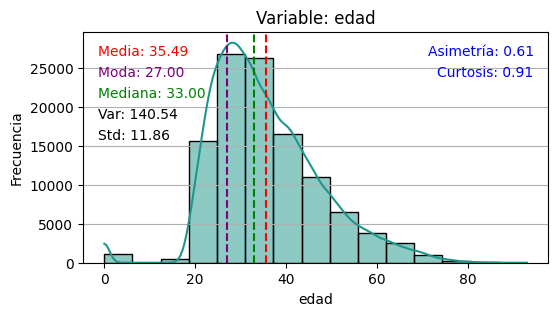

In [99]:
plot_histograma(df_sneep_no_ids_csv, 'edad', mvd= True, snk=True)

In [ ]:
media, moda, mediana, min, max, var, std, skewness, kurtosis = get_metrics_from_numeric_column(df_sneep_no_ids_csv, 'edad')

print(f"""Variable Edad
      Media:      {media:.2f}
      Moda:       {moda:.2f}
      Mediana:    {mediana:.2f}
      Mínimo:     {min:.2f}
      Máximo:     {max:.2f}
      Varianza:   {var:.2f}
      Desvío:     {std:.2f}
      Skewness:   {skewness:.2f}
      Kurtosis:   {kurtosis:.2f}
""")

Variable Edad
      Media:      35.49
      Moda:       27.00
      Mediana:    33.00
      Mínimo:     0.00
      Máximo:     93.00
      Varianza:   140.54
      Desvío:     11.86
      Skewness:   0.61
      Kurtosis:   0.91



#### Paso 3.1.2 - Análisis de outliers para la variable `Edad`

En esta sección se realizó un análisis de outliers para la variable `Edad`.

En una primera instancia se realiza el gráfico de Boxplot, en donde se puede observar que hay outliers con las siguientes características:

- Los valores menores al mínimo definido por el rango intercuartil $(Q1-1.5*IQR)$ son todos iguales a cero
- Hay muchos casos mayores al máximo definido por el rango intercuartil $(Q3+1.5*IQR)$

Debido a esto, se calcularo los siguientes valores relacionados al rango intercuartil (IQR):
- *Q1* (25%): 27
- *Q2* (50%): 33
- *Q3* (75%): 42
- *IQR*: 15
- Mín *IQR*: 4.50
- Max *IQR*: 64.50

Además, se calculó la cantidad de registros con edades menores y mayores a los valores que define el IQR:
- Cantidad de registros menores al mínimo definido por el IQR (4.5 años)
  - Cantidad: 1145
  - Valores: todos son iguales a cero
  - Conclusión: se tratan de valores nulos. Hace falta igualmente un análisis de nulos para determinar su tipo.
- Cantidad de registros mayores al máximo definido por el IQR (64.5 años)
  - Cantidad: 2464
  - Valores: de 65 hasta 93 años
  - Conclusión: son datos atípicos, pero parecen ser válidos

De este análisis podemos concluir que los valores de Skewness ($0.61$) y Kurtosis ($0.91$) reflejan correctamente la presencia de *outliers* para la variable `Edad`, ya que se tienen 3600 casos de datos atípicos (1145 son cero, es decir, posibles nulos), de un total de 111967 registros, es decir, un 3% de los datos de `edad` son outliers.

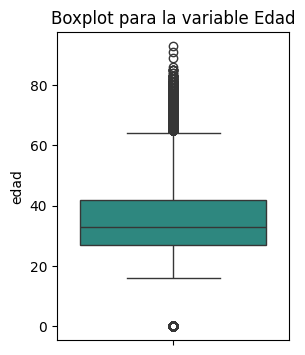

In [100]:
# Boxplot de la variable Edad
plt.figure(figsize=(3, 4))
sns.boxplot(data=df_sneep_no_ids_csv, y='edad', color=default_green_color)
plt.title("Boxplot para la variable Edad")
plt.show()

In [ ]:
Q1, Q2, Q3, IQR, min_iqr, max_iqr = get_iqr_metrics(df_sneep_no_ids_csv, "edad")

print(f"""Variable Edad
    Q1 (25%):   {Q1:.2f}
    Q2 (50%):   {Q2:.2f}
    Q3 (75%):   {Q3:.2f}
    IQR:        {IQR:.2f}
    Mín IQR:    {min_iqr:.2f}
    Max IQR:    {max_iqr:.2f}
""")

Variable Edad
    Q1 (25%):   27.00
    Q2 (50%):   33.00
    Q3 (75%):   42.00
    IQR:        15.00
    Mín IQR:    4.50
    Max IQR:    64.50



In [ ]:
print(f"Cantidad de registros totales: {df_sneep_no_ids_csv['edad'].count()}\n")

Cantidad de registros totales: 111967



In [ ]:
# Creamos un df temporal con los registros cuya edad sea menor al Min IQR (4)
df_temp = df_sneep_no_ids_csv[df_sneep_no_ids_csv["edad"] <= math.floor(min_iqr)]
unique_values = df_temp["edad"].unique().tolist()

# ordenamos de menor a mayor
unique_values.sort()

print(f"Cantidad de registros con edad menor al Min IQR: {df_temp['edad'].count()}\n")

print(f"|\tValor único\t|\tCantidad\t|")

for val in unique_values:
    cantidad = df_temp[df_temp["edad"] == val]["edad"].count()
    print(f"|\t{val}\t|\t{cantidad}\t|")

Cantidad de registros con edad menor al Min IQR: 1145

|	Valor único	|	Cantidad	|
|	0	|	1145	|


In [ ]:
# Creamos un df temporal con los registros cuya edad sea mayor al Máx IQR (64)
df_temp = df_sneep_no_ids_csv[df_sneep_no_ids_csv["edad"] > math.floor(max_iqr)]
unique_values = df_temp["edad"].unique().tolist()

# ordenamos de menor a mayor
unique_values.sort()

print(f"Cantidad de registros con edad mayor al Max IQR: {df_temp['edad'].count()}\n")

print(f"| Valor único\t| Cantidad\t|")

for val in unique_values:
    cantidad = df_temp[df_temp["edad"] == val]["edad"].count()
    print(f"|\t{val}\t|\t{cantidad}\t|")


Cantidad de registros con edad mayor al Max IQR: 2464

| Valor único	| Cantidad	|
|	65	|	358	|
|	66	|	310	|
|	67	|	292	|
|	68	|	244	|
|	69	|	248	|
|	70	|	220	|
|	71	|	162	|
|	72	|	136	|
|	73	|	100	|
|	74	|	97	|
|	75	|	64	|
|	76	|	66	|
|	77	|	48	|
|	78	|	31	|
|	79	|	26	|
|	80	|	17	|
|	81	|	14	|
|	82	|	9	|
|	83	|	10	|
|	84	|	2	|
|	85	|	6	|
|	86	|	1	|
|	89	|	1	|
|	91	|	1	|
|	93	|	1	|


### Paso 3.2 - Exploración de la variable `duracion_condena_anios`

A continuación, se detallan algunas métricas relacionadas a la variable `Duración condena años`:

| Métrica | Valor |
| --- | --- |
| Media     | 4.2  |
| Moda      | 0  |
| Mediana   | 3  |
| Mínimo    | 0.00   |
| Máximo    | 52  |
| Varianza  | 130.52 |
| Desvío    | 5.52  |
| Skewness  | 1.82   |
| Kurtosis  | 4.82   |

En la tabla anterior tenemos algunos valores que valen la pena analizar:

- Mínimo: el valor mínimo para `Duración condena años` es de cero. Esto podría deberse a que la persona en cuestión no haya recibido condena, o que la condena sea menor a un año.
- Máximo: el valor máximo para `Duración condena años` es de 52 años.
- Skewness
    - En nuestro caso, obtuvimos un valor de $1.82$.
    - Como el valor es mayor a 1, podemos decir que es altamente asimétrica.
    - Esto último podría deberse a la presencia de valores atípicos grandes, por lo cual vale la pena hacer un análisis de outliers.
- Kurtosis
    - En nuestro caso, obtuvimos un valor de $4.82$.
    - Un valor *mayor a cero* podría deberse a la presencia de outliers (*Leptocúrtico*). Entonces, vale la pena hacer un análisis de outliers para esta variable.

#### Paso 3.2.1 - Obtención de métricas para la variable `duracion_condena_anios`

En esta sección se puede encontrar el gráfico del histograma de la variable `Duración condena años`, en donde se detallan:

- Media ($4.2$)
- Moda ($0$)
- Mediana ($3$)
- Varianza ($130.52$)
- Desvío Estándar ($5.52$)
- Skewness o asimetría ($1.82$)
- Kurtosis ($4.82$)

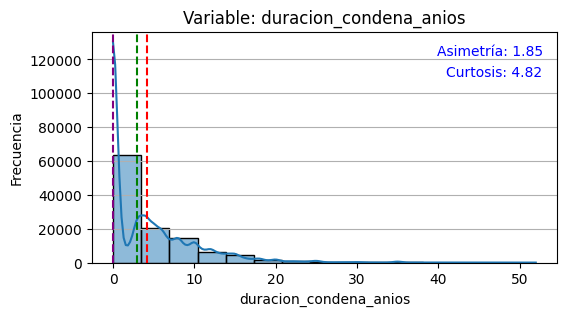

In [ ]:
plot_histograma(df_sneep_no_ids_csv, 'duracion_condena_anios', mvd= False, snk=True)

In [ ]:
media, moda, mediana, min, max, var, std, skewness, kurtosis = get_metrics_from_numeric_column(df_sneep_no_ids_csv, 'duracion_condena_anios')

print(f"""Variable Duración condena años
      Media:      {media:.2f}
      Moda:       {moda:.2f}
      Mediana:    {mediana:.2f}
      Mínimo:     {min:.2f}
      Máximo:     {max:.2f}
      Varianza:   {var:.2f}
      Desvío:     {std:.2f}
      Skewness:   {skewness:.2f}
      Kurtosis:   {kurtosis:.2f}
""")

Variable Duración condena años
      Media:      4.20
      Moda:       0.00
      Mediana:    3.00
      Mínimo:     0.00
      Máximo:     52.00
      Varianza:   30.52
      Desvío:     5.52
      Skewness:   1.85
      Kurtosis:   4.82



#### Paso 3.2.2 - Análisis de outliers para la variable `duracion_condena_anios`

En esta sección se realizó un análisis de outliers para la variable `duracion_condena_anios`.

En una primera instancia se realiza el gráfico de Boxplot, en donde se puede observar que hay outliers con las siguientes características:

- Hay muchos casos mayores al máximo definido por el rango intercuartil $(Q3+1.5*IQR)$

Debido a esto, se calcularo los siguientes valores relacionados al rango intercuartil (IQR):
- *Q1* (25%): 0
- *Q2* (50%): 3
- *Q3* (75%): 7
- *IQR*: 7
- Mín *IQR*: 0 (la cuenta da -10.5, pero carece de sentido al analizar años)
- Max *IQR*: 17.5

Además, se calculó la cantidad de registros con edades menores o iguales y mayores a los valores que define el IQR:
- Cantidad de registros menores o iguales al mínimo definido por el IQR (0 años)
  - Cantidad: 50324
  - Valores: todos son iguales a cero
  - Conclusión: en este caso se trata en su mayoría de registros cuyo valor de `situacion_legal_descripcion` no es `Condenado/a`, por lo cual, tiene sentido que la condena sea igual a cero. En total hay 44615 `no condenados/as`. Si bien estos datos son correctos, habría que ver si conviene tratarlos de otra forma, ya que no representan lo mismo que aquellos cuyo valor es `Condenado/a` y recibieron condena menor a 1 año. Además, existen un total de 5709 registros correspondientes a `Condenado/a` cuya condena en años es cero, pero esto puede deberse a que `duracion_condena_meses` o `duracion_condena_rango` sean distintas de cero, y correspondan a menos de un año.
- Cantidad de registros mayores al máximo definido por el IQR (64.5 años)
  - Cantidad: 3394
  - Valores: de 18 hasta 52 años
  - Conclusión: son datos atípicos, pero parecen ser válidos

De este análisis podemos concluir que los valores de Skewness ($1.82$) y Kurtosis ($4.82$) reflejan correctamente la presencia de *outliers* para la variable `duracion_condena_anios`:
- Respecto al Skewness, hay que considerar que tenemos 48705 registros con valores mayores a la mediana o Q2 (3 años), es decir, el 43.49% del total de registros (que son 111967).
- Respecto a la kurtosis, estamos ante un caso de distribución *leptocúrtica*. El motivo puede deberse a la cantidad de registros mayores al Máximo definido por el IQR (17.5), siendo 3394 o el 3.03% de los registros totales (total = 111967). En cuanto al valor alto de kurtosis (4.82), este también podría deberse a la asimetría presente en esta distribución.

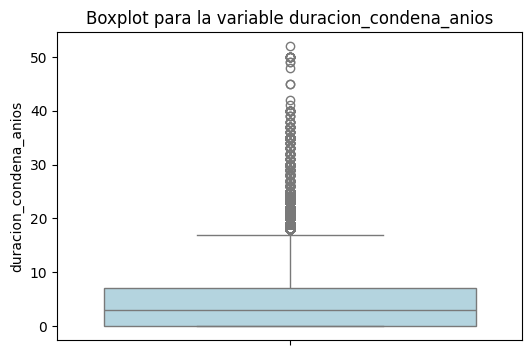

In [ ]:
# Boxplot de la variable duracion_condena_anios
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_sneep_no_ids_csv, y='duracion_condena_anios', color="lightblue")
plt.title("Boxplot para la variable duracion_condena_anios")
plt.show()

In [ ]:
print(f"Cantidad de registros totales: {df_sneep_no_ids_csv['duracion_condena_anios'].count()}\n")

Cantidad de registros totales: 111967



In [ ]:
Q1, Q2, Q3, IQR, min_iqr, max_iqr = get_iqr_metrics(df_sneep_no_ids_csv, "duracion_condena_anios")

print(f"""Variable duracion_condena_anios
    Q1 (25%):   {Q1:.2f}
    Q2 (50%):   {Q2:.2f}
    Q3 (75%):   {Q3:.2f}
    IQR:        {IQR:.2f}
    Mín IQR:    {min_iqr:.2f}
    Max IQR:    {max_iqr:.2f}
""")

Variable duracion_condena_anios
    Q1 (25%):   0.00
    Q2 (50%):   3.00
    Q3 (75%):   7.00
    IQR:        7.00
    Mín IQR:    -10.50
    Max IQR:    17.50



In [ ]:
df_temp = df_sneep_no_ids_csv[df_sneep_no_ids_csv["duracion_condena_anios"] == 0]
situacion_temp = df_temp["situacion_legal_descripcion"].unique().tolist()

print(f"Situacion legal de personas con duracion_condena_anios igual a cero: {situacion_temp}")

df_temp_condenados = df_temp[df_temp["situacion_legal_descripcion"] == 'Condenado/a']
df_temp_no_condenados = df_temp[df_temp["situacion_legal_descripcion"] != 'Condenado/a']

print(f"Cantidad de registros con duracion_condena_anios igual a cero años: {df_temp['duracion_condena_anios'].count()}")
print(f"Cantidad de condenados con duracion_condena_anios igual a cero años: {df_temp_condenados['duracion_condena_anios'].count()}")
print(f"Cantidad de no condenados: {df_temp_no_condenados['duracion_condena_anios'].count()}")

Situacion legal de personas con duracion_condena_anios igual a cero: ['Condenado/a', 'Procesado/a', 'Inimputable', 'Otra situación']
Cantidad de registros con duracion_condena_anios igual a cero años: 50324
Cantidad de condenados con duracion_condena_anios igual a cero años: 5709
Cantidad de no condenados: 44615


In [ ]:
# Creamos un df temporal con los registros cuya edad sea mayor al Q2 o Mediana (3)
df_temp = df_sneep_no_ids_csv[df_sneep_no_ids_csv["duracion_condena_anios"] > math.floor(Q2)]
unique_values = df_temp["duracion_condena_anios"].unique().tolist()

# ordenamos de menor a mayor
unique_values.sort()

print(f"Cantidad de registros con duracion_condena_anios mayor al Q2: {df_temp['duracion_condena_anios'].count()}\n")

Cantidad de registros con duracion_condena_anios mayor al Q2: 48705



In [ ]:
# Creamos un df temporal con los registros cuya edad sea mayor al Q3 (7)
df_temp = df_sneep_no_ids_csv[df_sneep_no_ids_csv["duracion_condena_anios"] > math.floor(Q3)]
unique_values = df_temp["duracion_condena_anios"].unique().tolist()

# ordenamos de menor a mayor
unique_values.sort()

print(f"Cantidad de registros con duracion_condena_anios mayor al Q3: {df_temp['duracion_condena_anios'].count()}\n")

Cantidad de registros con duracion_condena_anios mayor al Q3: 24832



In [ ]:
# Creamos un df temporal con los registros cuya edad sea mayor al Máx IQR (17.50)
df_temp = df_sneep_no_ids_csv[df_sneep_no_ids_csv["duracion_condena_anios"] > math.floor(max_iqr)]
unique_values = df_temp["duracion_condena_anios"].unique().tolist()

# ordenamos de menor a mayor
unique_values.sort()

print(f"Cantidad de registros con duracion_condena_anios mayor al Max IQR: {df_temp['duracion_condena_anios'].count()}\n")

print(f"| Valor único\t| Cantidad\t|")

for val in unique_values:
    cantidad = df_temp[df_temp["duracion_condena_anios"] == val]["duracion_condena_anios"].count()
    print(f"|\t{val}\t|\t{cantidad}\t|")


Cantidad de registros con duracion_condena_anios mayor al Max IQR: 3394

| Valor único	| Cantidad	|
|	18	|	758	|
|	19	|	293	|
|	20	|	616	|
|	21	|	165	|
|	22	|	235	|
|	23	|	174	|
|	24	|	158	|
|	25	|	357	|
|	26	|	51	|
|	27	|	47	|
|	28	|	55	|
|	29	|	37	|
|	30	|	99	|
|	31	|	12	|
|	32	|	27	|
|	33	|	16	|
|	34	|	9	|
|	35	|	215	|
|	36	|	8	|
|	37	|	17	|
|	38	|	6	|
|	39	|	3	|
|	40	|	18	|
|	41	|	1	|
|	42	|	1	|
|	45	|	2	|
|	48	|	1	|
|	49	|	2	|
|	50	|	10	|
|	52	|	1	|


### Paso 3.3 - Exploración de la variable `duracion_condena_meses`

A continuación, se detallan algunas métricas relacionadas a la variable `Duración condena meses`:

| Métrica | Valor |
| --- | --- |
| Media     | 1.33  |
| Moda      | 0  |
| Mediana   | 0  |
| Mínimo    | 0   |
| Máximo    | 48  |
| Varianza  | 8.42 |
| Desvío    | 2.90  |
| Skewness  | 2.98   |
| Kurtosis  | 17.20   |

En la tabla anterior tenemos algunos valores que valen la pena analizar:

- Mínimo: el valor mínimo para `Duración condena meses` es de cero. Esto podría deberse a que la persona en cuestión no haya recibido condena, o a que la condena se haya expresado solamente en años.
- Máximo: el valor máximo para `Duración condena meses` es de 48 meses.
- Skewness
    - En nuestro caso, obtuvimos un valor de $2.98$.
    - Como el valor es mayor a 1, podemos decir que es altamente asimétrica.
    - Esto último podría deberse a la presencia de valores atípicos grandes, por lo cual vale la pena hacer un análisis de outliers.
- Kurtosis
    - En nuestro caso, obtuvimos un valor de $17.20$.
    - Un valor *mayor a cero* podría deberse a la presencia de outliers (*Leptocúrtico*). Entonces, vale la pena hacer un análisis de outliers para esta variable.

#### Paso 3.3.1 - Obtención de métricas para la variable `duracion_condena_meses`

En esta sección se puede encontrar el gráfico del histograma de la variable `Duración condena meses`, en donde se detallan:

- Media ($1.33$)
- Moda ($0$)
- Mediana ($0$)
- Varianza ($8.42$)
- Desvío Estándar ($2.90$)
- Skewness o asimetría ($2.98$)
- Kurtosis ($17.20$)

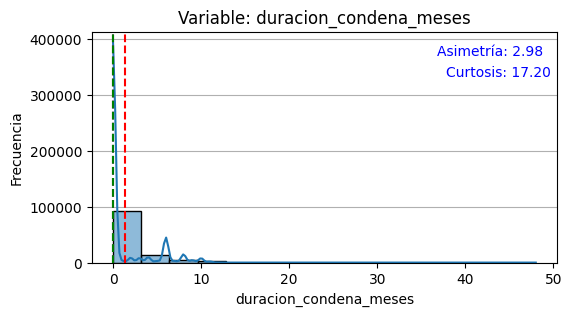

In [ ]:
plot_histograma(df_sneep_no_ids_csv, 'duracion_condena_meses', mvd= False, snk=True)

In [ ]:
media, moda, mediana, min, max, var, std, skewness, kurtosis = get_metrics_from_numeric_column(df_sneep_no_ids_csv, 'duracion_condena_meses')

print(f"""Variable duracion_condena_meses
      Media:      {media:.2f}
      Moda:       {moda:.2f}
      Mediana:    {mediana:.2f}
      Mínimo:     {min:.2f}
      Máximo:     {max:.2f}
      Varianza:   {var:.2f}
      Desvío:     {std:.2f}
      Skewness:   {skewness:.2f}
      Kurtosis:   {kurtosis:.2f}
""")

Variable duracion_condena_meses
      Media:      1.33
      Moda:       0.00
      Mediana:    0.00
      Mínimo:     0.00
      Máximo:     48.00
      Varianza:   8.42
      Desvío:     2.90
      Skewness:   2.98
      Kurtosis:   17.20



#### Paso 3.3.2 - Análisis de outliers para la variable `duracion_condena_meses`

En esta sección se realizó un análisis de outliers para la variable `duracion_condena_meses`.

En una primera instancia se realiza el gráfico de Boxplot, en donde se puede observar que la mayoría de los registros corresponden a outliers

Debido a esto, se calcularo los siguientes valores relacionados al rango intercuartil (IQR):
- *Q1* (25%): 0
- *Q2* (50%): 0
- *Q3* (75%): 0
- *IQR*: 0
- Mín *IQR*: 0
- Max *IQR*: 0

Como se puede observar, todos los valores relacionados al rango intercuartil (IQR) son cero. Al hacer un análisis más detallado, se encontró que hay 87374 registros con valor de `duracion_condena_meses` igual a cero meses, es decir, el 78.035% de los datos (de un total de 111967 registros).

Analizando como se distribuyen estos valores en función de la variable `situacion_legal_descripcion`, encontramos lo siguiente:
- Hay un total de 42759 registros con `situacion_legal_descripcion` igual a `Condenado/a` que tienene el valor de `duracion_condena_meses` igual a cero meses. Estos serían datos correctos.
- Hay un total de 44615 registros con `situacion_legal_descripcion` ***distintos*** a `Condenado/a` que tienene el valor de `duracion_condena_meses` igual a cero meses. Si bien estos datos son correctos, habría que ver si conviene tratarlos de otra forma, ya que no representan lo mismo.

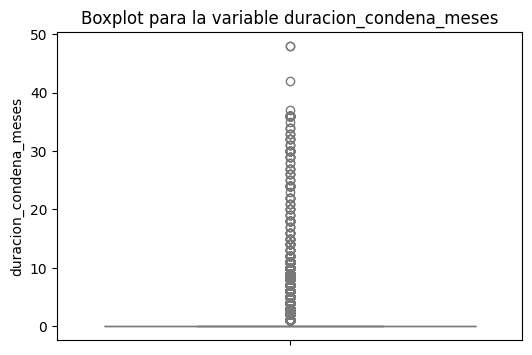

In [ ]:
# Boxplot de la variable duracion_condena_meses
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_sneep_no_ids_csv, y='duracion_condena_meses', color="lightblue")
plt.title("Boxplot para la variable duracion_condena_meses")
plt.show()

In [ ]:
print(f"Cantidad de registros totales: {df_sneep_no_ids_csv['duracion_condena_meses'].count()}\n")

Cantidad de registros totales: 111967



In [ ]:
Q1, Q2, Q3, IQR, min_iqr, max_iqr = get_iqr_metrics(df_sneep_no_ids_csv, "duracion_condena_meses")

print(f"""Variable duracion_condena_meses
    Q1 (25%):   {Q1:.2f}
    Q2 (50%):   {Q2:.2f}
    Q3 (75%):   {Q3:.2f}
    IQR:        {IQR:.2f}
    Mín IQR:    {min_iqr:.2f}
    Max IQR:    {max_iqr:.2f}
""")

Variable duracion_condena_meses
    Q1 (25%):   0.00
    Q2 (50%):   0.00
    Q3 (75%):   0.00
    IQR:        0.00
    Mín IQR:    0.00
    Max IQR:    0.00



In [ ]:
# Cantidad de registros con duracion_condena_meses igual a cero meses
df_sneep_no_ids_csv[df_sneep_no_ids_csv["duracion_condena_meses"] == 0]["duracion_condena_meses"].count()

87374

In [ ]:
df_temp = df_sneep_no_ids_csv[df_sneep_no_ids_csv["duracion_condena_meses"] == 0]
situacion_temp = df_temp["situacion_legal_descripcion"].unique().tolist()

print(f"Situacion legal de personas con duracion_condena_meses igual a cero: {situacion_temp}")

df_temp_condenados = df_temp[df_temp["situacion_legal_descripcion"] == 'Condenado/a']
df_temp_no_condenados = df_temp[df_temp["situacion_legal_descripcion"] != 'Condenado/a']

print(f"Cantidad de registros con duracion_condena_meses igual a cero años: {df_temp['duracion_condena_meses'].count()}")
print(f"Cantidad de condenados con duracion_condena_meses igual a cero años: {df_temp_condenados['duracion_condena_meses'].count()}")
print(f"Cantidad de no condenados: {df_temp_no_condenados['duracion_condena_meses'].count()}")

Situacion legal de personas con duracion_condena_meses igual a cero: ['Condenado/a', 'Procesado/a', 'Inimputable', 'Otra situación']
Cantidad de registros con duracion_condena_meses igual a cero años: 87374
Cantidad de condenados con duracion_condena_meses igual a cero años: 42759
Cantidad de no condenados: 44615


### Paso 3.4 - Exploración de la variable `duracion_condena_rango`

A continuación, se detallan algunas métricas relacionadas a la variable `Duración condena rango`:

| Métrica | Valor |
| --- | --- |
| Media     | 1.83  |
| Moda      | 0  |
| Mediana   | 1  |
| Mínimo    | 0  |
| Máximo    | 8  |
| Varianza  | 4.32 |
| Desvío    | 2.08  |
| Skewness  | 1.14   |
| Kurtosis  | 0.73   |

En la tabla anterior tenemos algunos valores que valen la pena analizar:

- Mínimo: el valor mínimo para `Duración condena años` es de cero.
- Máximo: el valor máximo para `Duración condena años` es de 8.
- Debido a los valores mínimos y máximos se cree que estamos ante una variable categórica expresada mediante números. Habrá que analizar las fuentes del dataset para determinar a que se refiere cada valor. Se intuye que la variable representa rangos de condena (por ejemplo: el valor 0 corresponde a *Entre 0 y 2 años*), pero se carece de la información necesaria.

#### Paso 3.4.1 - Obtención de métricas para la variable `duracion_condena_rango`

En esta sección se puede encontrar el gráfico del histograma de la variable `Duración condena rango`, en donde se detallan:

- Media ($1.83$)
- Moda ($0$)
- Mediana ($1$)
- Varianza ($4.32$)
- Desvío Estándar ($2.08$)
- Skewness o asimetría ($1.14$)
- Kurtosis ($0.73$)

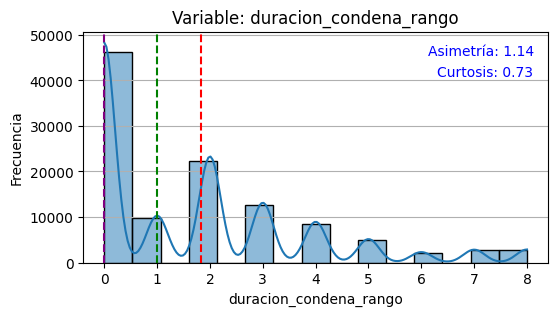

In [ ]:
plot_histograma(df_sneep_no_ids_csv, 'duracion_condena_rango', mvd= False, snk=True)

In [ ]:
media, moda, mediana, min, max, var, std, skewness, kurtosis = get_metrics_from_numeric_column(df_sneep_no_ids_csv, 'duracion_condena_rango')

print(f"""Variable Duración condena rango
      Media:      {media:.2f}
      Moda:       {moda:.2f}
      Mediana:    {mediana:.2f}
      Mínimo:     {min:.2f}
      Máximo:     {max:.2f}
      Varianza:   {var:.2f}
      Desvío:     {std:.2f}
      Skewness:   {skewness:.2f}
      Kurtosis:   {kurtosis:.2f}
""")

Variable Duración condena rango
      Media:      1.83
      Moda:       0.00
      Mediana:    1.00
      Mínimo:     0.00
      Máximo:     8.00
      Varianza:   4.32
      Desvío:     2.08
      Skewness:   1.14
      Kurtosis:   0.73



### Paso 3.5 - Conclusión del análisis para variables numéricas

Se obtuvieron las siguientes conclusiones al analizar las variables numéricas de nuestro dataset (a excepción de los `ids`):

- edad
    - Distribución moderadamente *asimétrica*
    - Es *leptocúrtica*
    - Presenta 3600 datos atípicos.
    - Entre ellos, 1145 corresponden al valor cero, por lo cual estamos en presencia de nulos.
    - El análisis de estos nulos se hará en futura secciones.
- duracion_condena_anios
    - Altamente *asimétrica*, ya que tiene 48705 registros (43.49% del total) con valores mayores a la mediana o Q2 (3 años).
    - Es *leptocúrtica*
    - Presenta 3394 datos atípicos.
    - Hay un total de 50324 registros con valores iguales a cero.
    - De estos, 44615 corresponden a `no condenados/as`. Si bien estos datos son correctos, habría que ver si conviene tratarlos de otra forma, ya que no representan lo mismo que aquellos cuyo valor es `Condenado/a` y recibieron condena menor a 1 año.
- duracion_condena_meses
    - Altamente *asimétrica*.
    - Es *leptocúrtica*
    - 87374 registros con valor igual a cero meses, es decir, el 78.035%.
    - Entre esos, hay un total de 44615 registros con `situacion_legal_descripcion` ***distintos*** a `Condenado/a` que tienene el valor de `duracion_condena_meses` igual a cero meses. Si bien estos datos son correctos, habría que ver si conviene tratarlos de otra forma, ya que no representan lo mismo que aquellos cuyo valor es `Condenado/a` y sus condenas se expresan solamente en años, sin meses.
- duracion_condena_rango
    - Valores enteros entre 0 y 8.
    - Posiblemente sea una categórica representada mediante números.
    - No se tiene suficiente información respecto a que representa cada valor.

## Paso 4 - Exploración de distribuciones de variables categóricas

### Paso 4.1 - Distribuciones de variables categóricas

A continuación, se explorarán las distribuciones de las siguientes variabels categóricas, cuyos valores resultan de interés:

- genero_descripcion
- nivel_instruccion_descripcion
- ultima_situacion_laboral_descripcion
- situacion_legal_descripcion
- es_reincidente_descripcion
- reparticion_descripcion
- tuvo_reduccion_pena_descripcion

#### Paso 4.1.1 - Distribución de variable `genero_descripcion`

La variable `genero_descripcion` se distribuye de la siguiente manera:

| Valor | Cantidad |
| --- | --- |
| Varón                  | 107116 |
| Mujer                  |   4642 |
| Trans Mujer/Travesti   |    173 |
| Trans Varón            |     35 |
| No Binario             |      1 |

Como se puede observar, es una variable altamente desbalanceada, ya que su moda es `Varón`, y representa el $95.67$% de los datos.

Esto también puede observarse al obtener la `Entropía de Shannon` para dicha variable, cuyo valor es $0.187$, de un máximo posible de $2.322$.
Al ser un valor relativamente bajo, indica que hay poca incertidumbre, es decir, se demuestra que hay una categoría (`Varón`) que domina al resto.

Se agregan además gráficos de *histogramas* y de *frecuencias relativas* en donde se puede observar como los valores distintos de `Varón` y `Mujer` son ínfimos en comparación a estos dos.

También se analizó como se distribuye la variable `edad` en función de la variable `genero_descripcion`, obteniendo el siguiente resultado:

| genero_descripcion | Media | Mediana | Valor mínimo | Valor máximo | Cantidad |
| --- | --- | --- | --- | --- | --- |
| Mujer | 36.995907 | 35.0 | 0 | 82 | 4642 |
| No Binario | 30.000000 | 30.0 | 30 | 30 | 1 |
| Trans Mujer/Travesti | 36.745665 | 36.0 | 0 | 59 | 173 |
| Trans Varón | 34.285714 | 33.0 | 21 | 67 | 35 |
| Varón | 35.423625 | 33.0 | 0 | 93 | 107116 |

<br/>

> ***Nota***: Recordar que la variable `edad` presenta datos erróneos con valores iguales a cero, además de ciertos *outliers*.

Por último, se muestra un *boxplot* de `edad` en función de `genero_descripcion`.

In [26]:
# Mostramos como se distribuyen los valores de la variable genero_descripcion, incluyendo NAs
df_sneep_no_ids_csv["genero_descripcion"].value_counts(dropna=False)

genero_descripcion
Varón                   107116
Mujer                     4642
Trans Mujer/Travesti       173
Trans Varón                 35
No Binario                   1
Name: count, dtype: int64

In [50]:
total = df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)["genero_descripcion"].count()
moda = df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)["genero_descripcion"].mode()[0]

cant_igual_moda = df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)[df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)["genero_descripcion"] == moda]["genero_descripcion"].count()
porcentaje_moda = cant_igual_moda*100/total

print(f"La moda de la variable \'genero_descripcion\' es \'{moda}\', y representa el {porcentaje_moda:.2f}% de los datos (total: {total})")

La moda de la variable 'genero_descripcion' es 'Varón', y representa el 95.67% de los datos (total: 111967)


In [ ]:
obtener_entropia_de_shannon(df_sneep_no_ids_csv, "genero_descripcion")

Variable "genero_descripcion"
          Entropía:             0.18696572563901298
          Max entropía posible: 2.321928094887362


(0.18696572563901298, 2.321928094887362)

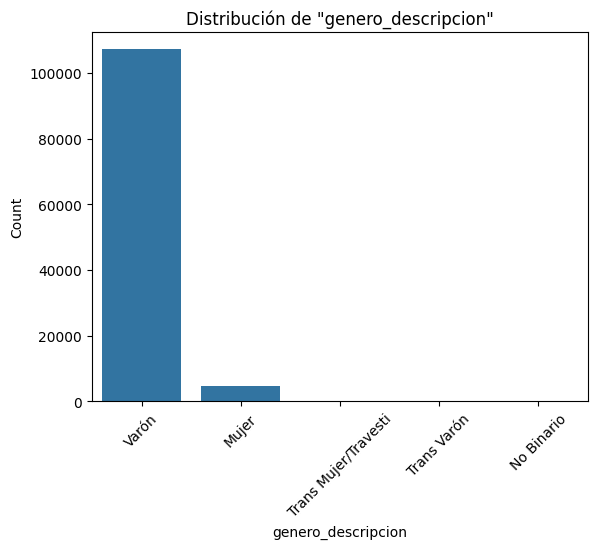

In [ ]:
graficar_distribucion_histograma(data=df_sneep_no_ids_csv, col="genero_descripcion", titulo="Distribución de \"genero_descripcion\"", xlabel="genero_descripcion")

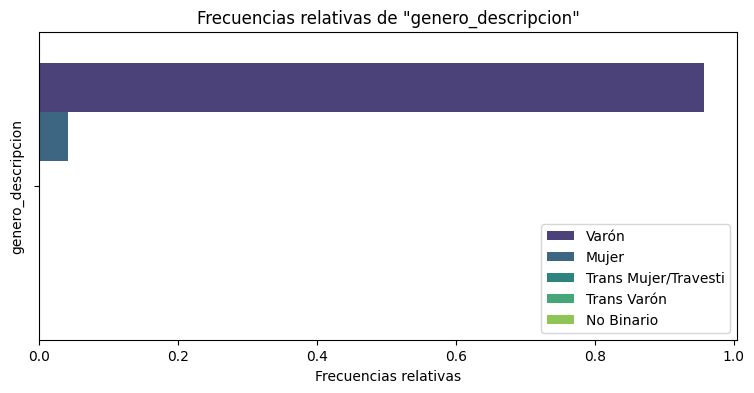

In [ ]:
graficar_frecuencias_relativas(data=df_sneep_no_ids_csv, col="genero_descripcion", titulo="Frecuencias relativas de \"genero_descripcion\"", xlabel="Frecuencias relativas", ylabel="genero_descripcion")

In [ ]:
agrupar_por_columnas_info_aggregation(df_sneep_no_ids_csv, ["genero_descripcion"], fn_to_apply=fill_na_as_string_lambda, info_from_col="edad", agg=agg_mean_median_min_max_count)

,Media,Mediana,Valor mínimo,Valor máximo,Cantidad
genero_descripcion,,,,,
Mujer,36.995907,35.0,0,82,4642
No Binario,30.000000,30.0,30,30,1
Trans Mujer/Travesti,36.745665,36.0,0,59,173
Trans Varón,34.285714,33.0,21,67,35
Varón,35.423625,33.0,0,93,107116


> ***Nota***: Recordar que la variable `edad` presenta datos erroneos con valores iguales a cero.

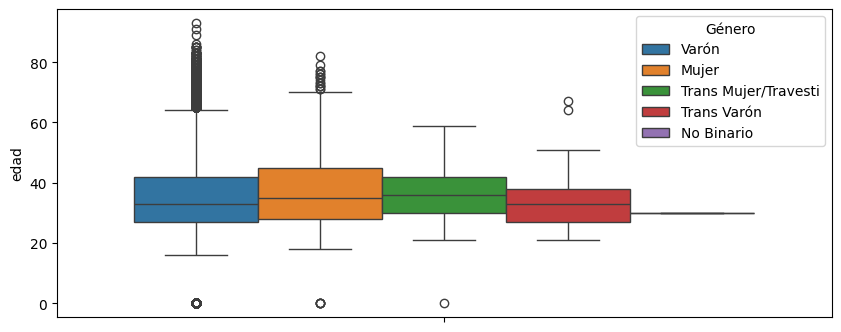

In [ ]:
graficar_boxplot(df_sneep_no_ids_csv, col="edad", col_division="genero_descripcion", titulo="Género")

#### Paso 4.1.2 - Distribución de variable `nivel_instruccion_descripcion`

La variable `nivel_instruccion_descripcion` se distribuye de la siguiente manera:

| Valor | Cantidad |
| --- | --- |
| Primario completo        |   33432 |
| Secundario incompleto    |   27572 |
| Primario incompleto      |   23416 |
| Secundario completo      |   11155 |
| NaN                      |    7737 |
| Ninguno                  |    5539 |
| Universitario incompleto |    1202 |
| Terciario completo       |     740 |
| Terciario incompleto     |     626 |
| Universitario completo   |     548 |

La moda de esta variable es `Primario completo`, y representa el $29.86$% de los datos.

En este caso, la `Entropía de Shannon` para dicha variable tiene un valor de $1.592$, de un máximo posible de $3.17$.
Esto refleja que hay ciertos valores que dominan al resto, por ejemplo `Primario completo` (moda), `Secundario incompleto`, `Primario incompleto`, y `Secundario completo`.

Nótese además que esta variable presenta ***datos nulos***, expresados mediante el valor `NaN`.

También se analizó como se distribuye la variable `edad` en función de la variable `nivel_instruccion_descripcion`, obteniendo el siguiente resultado:

| nivel_instruccion_descripcion | Media | Mediana | Valor mínimo | Valor máximo | Cantidad |
| --- | --- | --- | --- | --- | --- |
| N/A | 34.980354 | 33.0 | 0 | 84 | 7737 |
| Ninguno | 38.997292 | 36.0 | 0 | 91 | 5539 |
| Primario completo | 35.551926 | 34.0 | 0 | 89 | 33432 |
| Primario incompleto | 35.730184 | 34.0 | 0 | 93 | 23416 |
| Secundario completo | 37.116898 | 36.0 | 0 | 85 | 11155 |
| Secundario incompleto | 33.386769 | 31.0 | 0 | 82 | 27572 |
| Terciario completo | 43.152703 | 42.0 | 0 | 85 | 740 |
| Terciario incompleto | 39.142173 | 38.0 | 0 | 79 | 626 |
| Universitario completo | 42.381387 | 40.0 | 0 | 85 | 548 |
| Universitario incompleto | 39.633943 | 38.5 | 0 | 77 | 1202 |


<br/>

> ***Nota***: Recordar que la variable `edad` presenta datos erróneos con valores iguales a cero, además de ciertos *outliers*.

Por último, se muestra un *boxplot* de `edad` en función de `nivel_instruccion_descripcion`.

In [ ]:
df_sneep_no_ids_csv["nivel_instruccion_descripcion"].value_counts(dropna=False)

nivel_instruccion_descripcion
Primario completo           33432
Secundario incompleto       27572
Primario incompleto         23416
Secundario completo         11155
NaN                          7737
Ninguno                      5539
Universitario incompleto     1202
Terciario completo            740
Terciario incompleto          626
Universitario completo        548
Name: count, dtype: int64

In [ ]:
total = df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)["nivel_instruccion_descripcion"].count()
moda = df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)["nivel_instruccion_descripcion"].mode()[0]

cant_igual_moda = df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)[df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)["nivel_instruccion_descripcion"] == moda]["nivel_instruccion_descripcion"].count()
porcentaje_moda = cant_igual_moda*100/total

print(f"La moda de la variable \'nivel_instruccion_descripcion\' es \'{moda}\', y representa el {porcentaje_moda:.2f}% de los datos (total: {total})")

La moda de la variable 'nivel_instruccion_descripcion' es 'Primario completo', y representa el 29.86% de los datos (total: 111967)


In [ ]:
obtener_entropia_de_shannon(df_sneep_no_ids_csv, "nivel_instruccion_descripcion")

Variable "nivel_instruccion_descripcion"
          Entropía:             1.591978415737859
          Max entropía posible: 3.169925001442312


(1.591978415737859, 3.169925001442312)

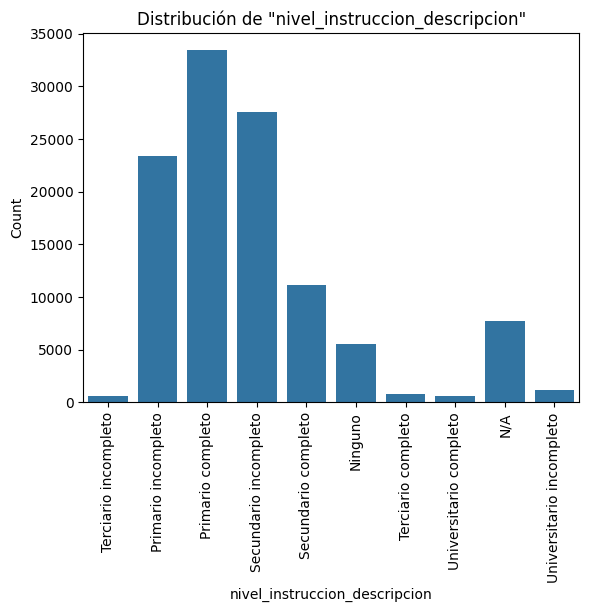

In [ ]:
graficar_distribucion_histograma(data=df_sneep_no_ids_csv.fillna("N/A"), col="nivel_instruccion_descripcion", titulo="Distribución de \"nivel_instruccion_descripcion\"", xlabel="nivel_instruccion_descripcion", rotation=90)

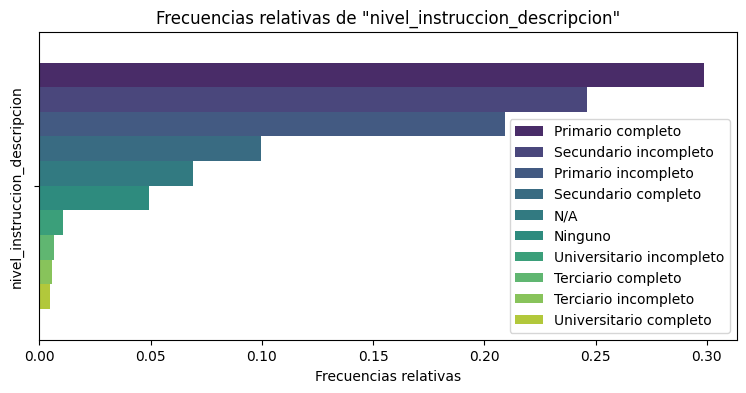

In [ ]:
graficar_frecuencias_relativas(data=df_sneep_no_ids_csv.fillna("N/A"), col="nivel_instruccion_descripcion", titulo="Frecuencias relativas de \"nivel_instruccion_descripcion\"", xlabel="Frecuencias relativas", ylabel="nivel_instruccion_descripcion")

In [ ]:
agrupar_por_columnas_info_aggregation(df_sneep_no_ids_csv, ["nivel_instruccion_descripcion"], fn_to_apply=fill_na_as_string_lambda, info_from_col="edad", agg=agg_mean_median_min_max_count)

,Media,Mediana,Valor mínimo,Valor máximo,Cantidad
nivel_instruccion_descripcion,,,,,
N/A,34.980354,33.0,0,84,7737
Ninguno,38.997292,36.0,0,91,5539
Primario completo,35.551926,34.0,0,89,33432
Primario incompleto,35.730184,34.0,0,93,23416
Secundario completo,37.116898,36.0,0,85,11155
Secundario incompleto,33.386769,31.0,0,82,27572
Terciario completo,43.152703,42.0,0,85,740
Terciario incompleto,39.142173,38.0,0,79,626
Universitario completo,42.381387,40.0,0,85,548


> ***Nota***: Recordar que la variable `edad` presenta datos erroneos con valores iguales a cero.

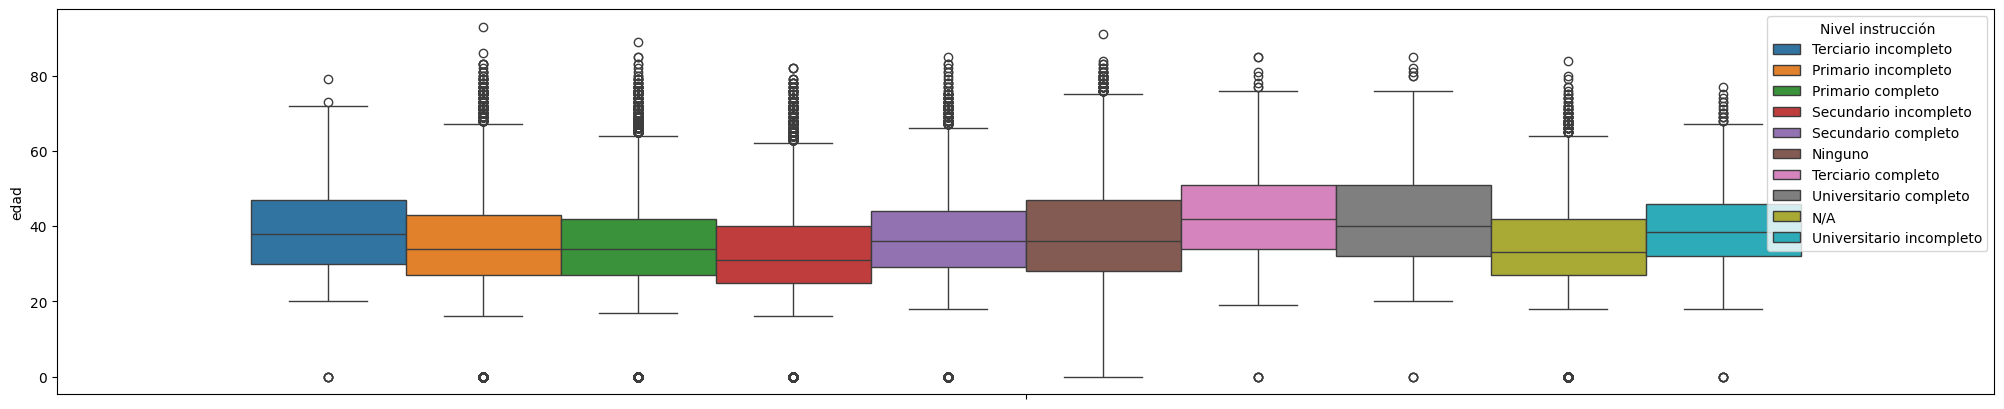

In [ ]:
graficar_boxplot(df_sneep_no_ids_csv.apply(fill_na_as_string_lambda), col="edad", col_division="nivel_instruccion_descripcion", titulo="Nivel instrucción", figsize=(25,5))

#### Paso 4.1.3 - Distribución de variable `ultima_situacion_laboral_descripcion`

La variable `ultima_situacion_laboral_descripcion` se distribuye de la siguiente manera:

| Valor | Cantidad |
| --- | --- |
| Trabajador/ra de tiempo parcial   |  40671 |
| Desocupado/a                      |  39958 |
| Trabajador/ra de tiempo completo  |  30449 |
| NaN                               |    889 |

La moda de esta variable es `Trabajador/ra de tiempo parcial`, y representa el $36.32$% de los datos.

En este caso, la `Entropía de Shannon` para dicha variable tiene un valor de $1.09$, de un máximo posible de $1.58$.
Al ser un valor alto de entropía significa que hay mucha incertidumbre, lo cual puede deberse a que las clases están bien distribuídas.

Nótese además que esta variable presenta ***datos nulos***, expresados mediante el valor `NaN`, pero estos son relativamente bajos.

También se analizó como se distribuye la variable `edad` en función de la variable `ultima_situacion_laboral_descripcion`, obteniendo el siguiente resultado:

| ultima_situacion_laboral_descripcion | Media | Mediana | Valor mínimo | Valor máximo | Cantidad |
| --- | --- | --- | --- | --- | --- |
| Desocupado/a | 33.989439 | 32.0 | 0 | 91 | 39958 |
| N/A | 35.449944 | 33.0 | 0 | 76 | 889 |
| Trabajador/ra de tiempo completo | 36.758087 | 35.0 | 0 | 86 | 30449 |
| Trabajador/ra de tiempo parcial | 36.016990 | 34.0 | 0 | 93 | 40671 |

<br/>

> ***Nota***: Recordar que la variable `edad` presenta datos erróneos con valores iguales a cero, además de ciertos *outliers*.

Por último, se muestra un *boxplot* de `edad` en función de `ultima_situacion_laboral_descripcion`.

In [ ]:
df_sneep_no_ids_csv["ultima_situacion_laboral_descripcion"].value_counts(dropna=False)

ultima_situacion_laboral_descripcion
Trabajador/ra de tiempo parcial     40671
Desocupado/a                        39958
Trabajador/ra de tiempo completo    30449
NaN                                   889
Name: count, dtype: int64

In [ ]:
total = df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)["ultima_situacion_laboral_descripcion"].count()
moda = df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)["ultima_situacion_laboral_descripcion"].mode()[0]

cant_igual_moda = df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)[df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)["ultima_situacion_laboral_descripcion"] == moda]["ultima_situacion_laboral_descripcion"].count()
porcentaje_moda = cant_igual_moda*100/total

print(f"La moda de la variable \'ultima_situacion_laboral_descripcion\' es \'{moda}\', y representa el {porcentaje_moda:.2f}% de los datos (total: {total})")

La moda de la variable 'ultima_situacion_laboral_descripcion' es 'Trabajador/ra de tiempo parcial', y representa el 36.32% de los datos (total: 111967)


In [ ]:
obtener_entropia_de_shannon(df_sneep_no_ids_csv, "ultima_situacion_laboral_descripcion")

Variable "ultima_situacion_laboral_descripcion"
          Entropía:             1.0904278100123772
          Max entropía posible: 1.584962500721156


(1.0904278100123772, 1.584962500721156)

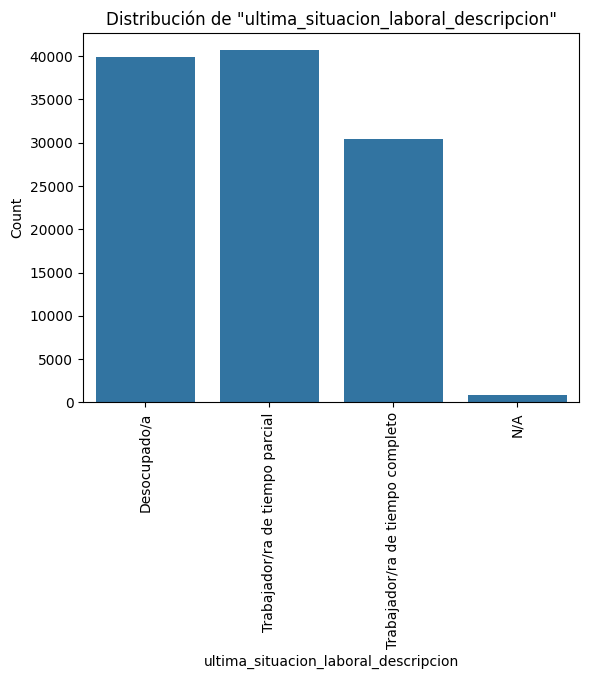

In [ ]:
graficar_distribucion_histograma(data=df_sneep_no_ids_csv.fillna("N/A"), col="ultima_situacion_laboral_descripcion", titulo="Distribución de \"ultima_situacion_laboral_descripcion\"", xlabel="ultima_situacion_laboral_descripcion", rotation=90)

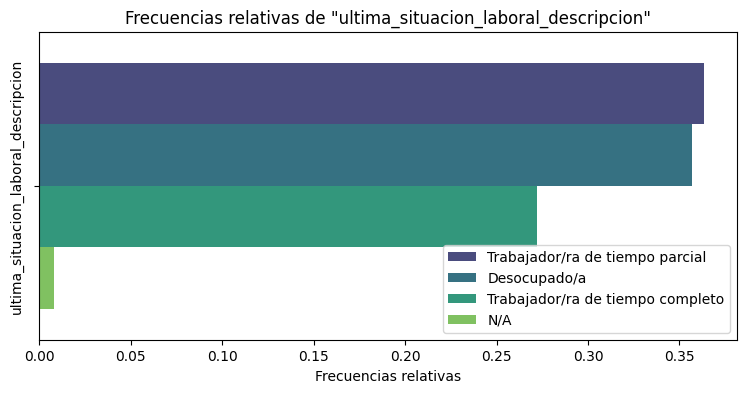

In [ ]:
graficar_frecuencias_relativas(data=df_sneep_no_ids_csv.fillna("N/A"), col="ultima_situacion_laboral_descripcion", titulo="Frecuencias relativas de \"ultima_situacion_laboral_descripcion\"", xlabel="Frecuencias relativas", ylabel="ultima_situacion_laboral_descripcion")

In [ ]:
agrupar_por_columnas_info_aggregation(df_sneep_no_ids_csv, ["ultima_situacion_laboral_descripcion"], fn_to_apply=fill_na_as_string_lambda, info_from_col="edad", agg=agg_mean_median_min_max_count)

,Media,Mediana,Valor mínimo,Valor máximo,Cantidad
ultima_situacion_laboral_descripcion,,,,,
Desocupado/a,33.989439,32.0,0,91,39958
N/A,35.449944,33.0,0,76,889
Trabajador/ra de tiempo completo,36.758087,35.0,0,86,30449
Trabajador/ra de tiempo parcial,36.016990,34.0,0,93,40671


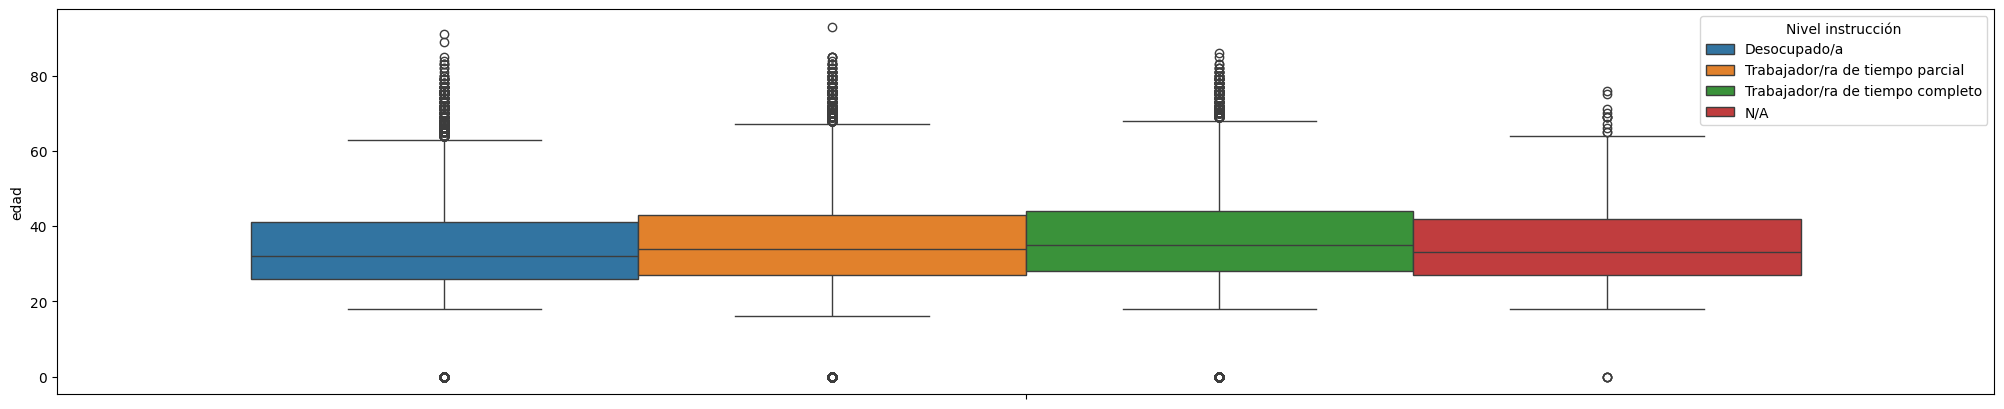

In [ ]:
graficar_boxplot(df_sneep_no_ids_csv.apply(fill_na_as_string_lambda), col="edad", col_division="ultima_situacion_laboral_descripcion", titulo="Nivel instrucción", figsize=(25,5))

#### Paso 4.1.4 - Distribución de variable `situacion_legal_descripcion`

La variable `situacion_legal_descripcion` se distribuye de la siguiente manera:

| Valor | Cantidad |
| --- | --- |
| Condenado/a     |  67352 |
| Procesado/a     |  43459 |
| Otra situación  |    864 |
| Inimputable     |    292 |

La moda de esta variable es `Condenado/a`, y representa el $60.15$% de los datos.

En este caso, la `Entropía de Shannon` para dicha variable tiene un valor de $0.73$, de un máximo posible de $2.0$. <br/>
Al ser un valor relativamente bajo de entropía significa que hay poca incertidumbre, lo cual puede deberse a que la clase `Condenado/a` domina al resto.

También se analizó como se distribuye la variable `edad` en función de la variable `situacion_legal_descripcion`, obteniendo el siguiente resultado:

| situacion_legal_descripcion | Media | Mediana | Valor mínimo | Valor máximo | Cantidad |
| --- | --- | --- | --- | --- | --- |
| Condenado/a | 36.119106 | 34.0 | 0 | 93 | 67352 |
| Inimputable | 39.886986 | 37.0 | 0 | 81 | 292 |
| Otra situación | 33.599537 | 32.0 | 0 | 80 | 864 |
| Procesado/a | 34.524218 | 33.0 | 0 | 86 | 43459 |

<br/>

> ***Nota***: Recordar que la variable `edad` presenta datos erróneos con valores iguales a cero, además de ciertos *outliers*.

Por último, se muestra un *boxplot* de `edad` en función de `situacion_legal_descripcion`.

In [ ]:
df_sneep_no_ids_csv["situacion_legal_descripcion"].value_counts(dropna=False)

situacion_legal_descripcion
Condenado/a       67352
Procesado/a       43459
Otra situación      864
Inimputable         292
Name: count, dtype: int64

In [ ]:
total = df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)["situacion_legal_descripcion"].count()
moda = df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)["situacion_legal_descripcion"].mode()[0]

cant_igual_moda = df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)[df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)["situacion_legal_descripcion"] == moda]["situacion_legal_descripcion"].count()
porcentaje_moda = cant_igual_moda*100/total

print(f"La moda de la variable \'situacion_legal_descripcion\' es \'{moda}\', y representa el {porcentaje_moda:.2f}% de los datos (total: {total})")

La moda de la variable 'situacion_legal_descripcion' es 'Condenado/a', y representa el 60.15% de los datos (total: 111967)


In [ ]:
obtener_entropia_de_shannon(df_sneep_no_ids_csv, "situacion_legal_descripcion")

Variable "situacion_legal_descripcion"
          Entropía:             0.726125597943428
          Max entropía posible: 2.0


(0.726125597943428, 2.0)

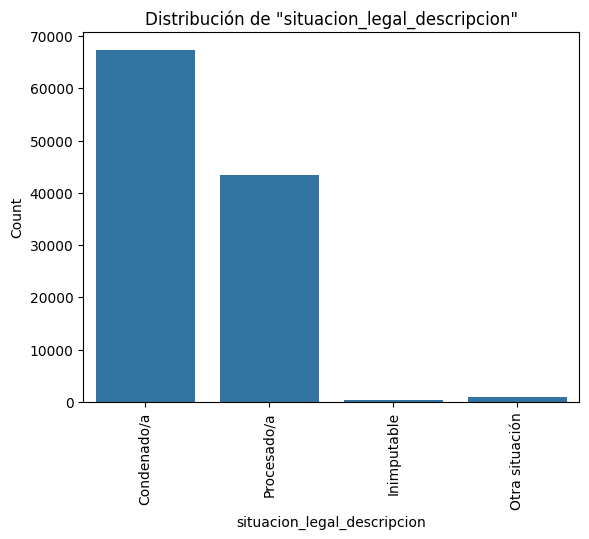

In [ ]:
graficar_distribucion_histograma(data=df_sneep_no_ids_csv.fillna("N/A"), col="situacion_legal_descripcion", titulo="Distribución de \"situacion_legal_descripcion\"", xlabel="situacion_legal_descripcion", rotation=90)

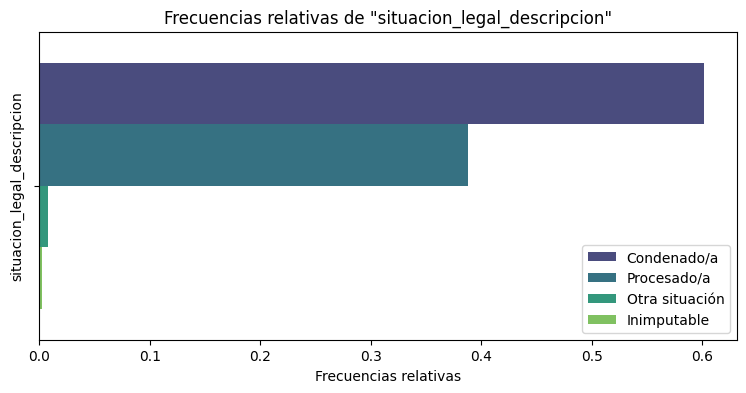

In [ ]:
graficar_frecuencias_relativas(data=df_sneep_no_ids_csv.fillna("N/A"), col="situacion_legal_descripcion", titulo="Frecuencias relativas de \"situacion_legal_descripcion\"", xlabel="Frecuencias relativas", ylabel="situacion_legal_descripcion")

In [ ]:
agrupar_por_columnas_info_aggregation(df_sneep_no_ids_csv, ["situacion_legal_descripcion"], fn_to_apply=fill_na_as_string_lambda, info_from_col="edad", agg=agg_mean_median_min_max_count)

,Media,Mediana,Valor mínimo,Valor máximo,Cantidad
situacion_legal_descripcion,,,,,
Condenado/a,36.119106,34.0,0,93,67352
Inimputable,39.886986,37.0,0,81,292
Otra situación,33.599537,32.0,0,80,864
Procesado/a,34.524218,33.0,0,86,43459


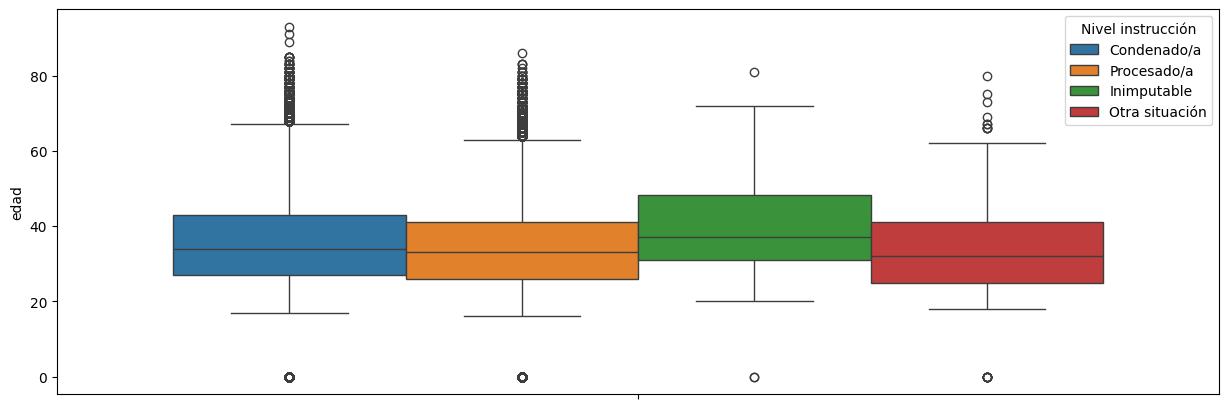

In [ ]:
graficar_boxplot(df_sneep_no_ids_csv.apply(fill_na_as_string_lambda), col="edad", col_division="situacion_legal_descripcion", titulo="Nivel instrucción", figsize=(15,5))

#### Paso 4.1.5 - Distribución de variable `es_reincidente_descripcion`

La variable `es_reincidente_descripcion` se distribuye de la siguiente manera:

| Valor | Cantidad |
| --- | --- |
| NaN                        | 48931 |
| Primario/a                 | 43801 |
| Reincidente (art. 50 CP)   | 12720 |
| Reiterante                 |  6515 |

La moda de esta variable es `NaN`, correspondientes a datos nulos, y representa el $43.70$% de los datos.

En este caso, la `Entropía de Shannon` para dicha variable tiene un valor de $0.81$, de un máximo posible de $1.584$. <br/>
Este valor puede deberse a que hay dos clases (`N/A` o `NaN`, y `Primario/a`) que dominan al resto.

También se analizó como se distribuye la variable `edad` en función de la variable `es_reincidente_descripcion`, obteniendo el siguiente resultado:

| es_reincidente_descripcion | Media | Mediana | Valor mínimo | Valor máximo | Cantidad |
| --- | --- | --- | --- | --- | --- |
| N/A | 34.610063 | 33.0 | 0 | 86 | 48931 |
| Primario/a | 36.510924 | 34.0 | 0 | 93 | 43801 |
| Reincidente (art. 50 CP) | 35.489780 | 34.0 | 0 | 84 | 12720 |
| Reiterante | 35.243131 | 33.0 | 0 | 91 | 6515 |

<br/>

> ***Nota***: Recordar que la variable `edad` presenta datos erróneos con valores iguales a cero, además de ciertos *outliers*.

Por último, se muestra un *boxplot* de `edad` en función de `es_reincidente_descripcion`.

In [ ]:
df_sneep_no_ids_csv["es_reincidente_descripcion"].value_counts(dropna=False)

es_reincidente_descripcion
NaN                         48931
Primario/a                  43801
Reincidente (art. 50 CP)    12720
Reiterante                   6515
Name: count, dtype: int64

In [ ]:
total = df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)["es_reincidente_descripcion"].count()
moda = df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)["es_reincidente_descripcion"].mode()[0]

cant_igual_moda = df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)[df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)["es_reincidente_descripcion"] == moda]["es_reincidente_descripcion"].count()
porcentaje_moda = cant_igual_moda*100/total

print(f"La moda de la variable \'es_reincidente_descripcion\' es \'{moda}\', y representa el {porcentaje_moda:.2f}% de los datos (total: {total})")

La moda de la variable 'es_reincidente_descripcion' es 'N/A', y representa el 43.70% de los datos (total: 111967)


In [ ]:
obtener_entropia_de_shannon(df_sneep_no_ids_csv, "es_reincidente_descripcion")

Variable "es_reincidente_descripcion"
          Entropía:             0.8105036562669286
          Max entropía posible: 1.584962500721156


(0.8105036562669286, 1.584962500721156)

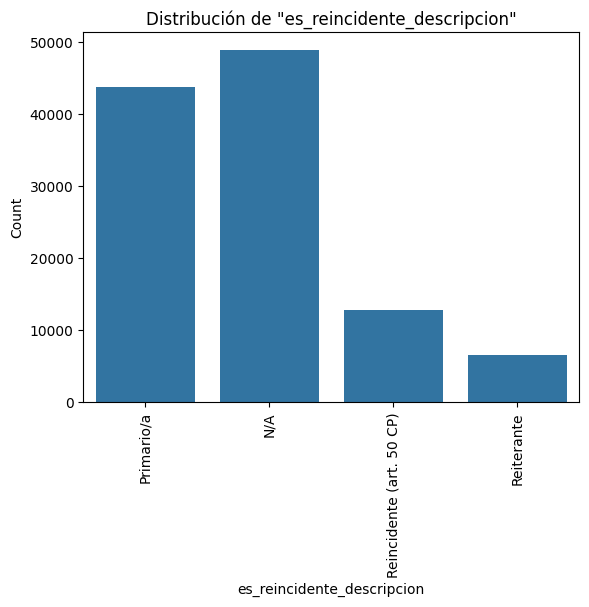

In [ ]:
graficar_distribucion_histograma(data=df_sneep_no_ids_csv.fillna("N/A"), col="es_reincidente_descripcion", titulo="Distribución de \"es_reincidente_descripcion\"", xlabel="es_reincidente_descripcion", rotation=90)

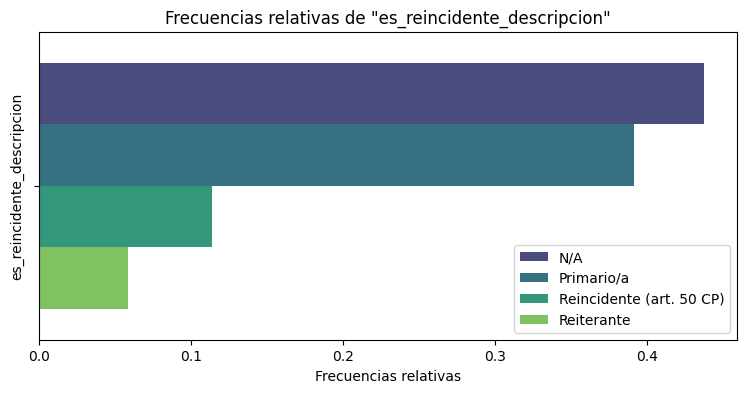

In [ ]:
graficar_frecuencias_relativas(data=df_sneep_no_ids_csv.fillna("N/A"), col="es_reincidente_descripcion", titulo="Frecuencias relativas de \"es_reincidente_descripcion\"", xlabel="Frecuencias relativas", ylabel="es_reincidente_descripcion")

In [ ]:
agrupar_por_columnas_info_aggregation(df_sneep_no_ids_csv, ["es_reincidente_descripcion"], fn_to_apply=fill_na_as_string_lambda, info_from_col="edad", agg=agg_mean_median_min_max_count)

,Media,Mediana,Valor mínimo,Valor máximo,Cantidad
es_reincidente_descripcion,,,,,
N/A,34.610063,33.0,0,86,48931
Primario/a,36.510924,34.0,0,93,43801
Reincidente (art. 50 CP),35.489780,34.0,0,84,12720
Reiterante,35.243131,33.0,0,91,6515


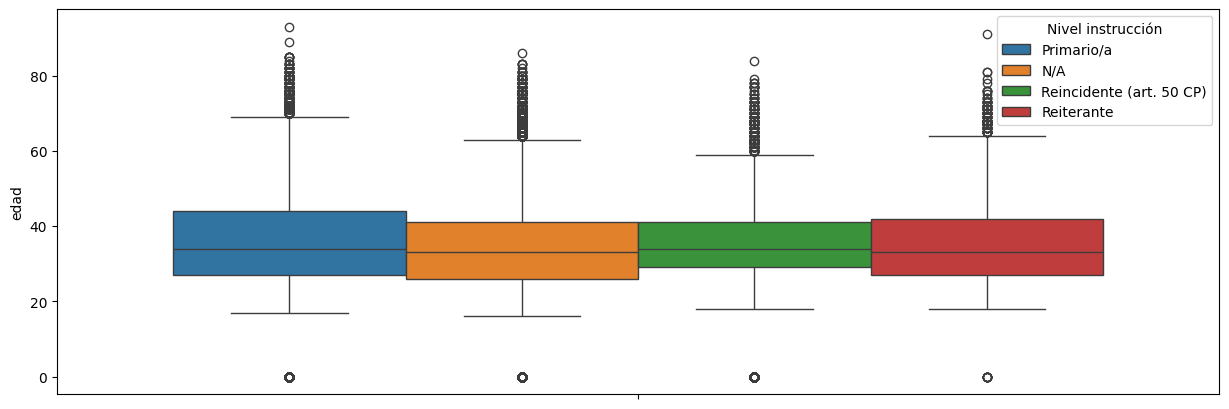

In [ ]:
graficar_boxplot(df_sneep_no_ids_csv.apply(fill_na_as_string_lambda), col="edad", col_division="es_reincidente_descripcion", titulo="Nivel instrucción", figsize=(15,5))

#### Paso 4.1.6 - Distribución de variable `reparticion_descripcion`

La variable `reparticion_descripcion` se distribuye de la siguiente manera:

| Valor | Cantidad |
| --- | --- |
| Provincial |   97729 |
| Federal    |   11226 |
| NaN        |    3012 |

La moda de esta variable es `Provincial`, y representa el $87.28$% de los datos.

Además, hay unos registros 3012 con datos nulos (`N/A` o `NaN`).

En este caso, la `Entropía de Shannon` para dicha variable tiene un valor de $0.332$, de un máximo posible de $1.0$. <br/>
En ese caso, una entropía relativamente baja representa que hay poca entropía, lo cual se debe a que hay una clase que domina al resto (`Provincial`).

También se analizó como se distribuye la variable `edad` en función de la variable `reparticion_descripcion`, obteniendo el siguiente resultado:

| reparticion_descripcion | Media | Mediana | Valor mínimo | Valor máximo | Cantidad |
| --- | --- | --- | --- | --- | --- |
| Federal | 34.423214 | 34.0 | 0 | 85 | 11226 |
| N/A | 32.723772 | 31.0 | 0 | 78 | 3012 |
| Provincial | 35.698309 | 33.0 | 0 | 93 | 97729 |

<br/>

> ***Nota***: Recordar que la variable `edad` presenta datos erróneos con valores iguales a cero, además de ciertos *outliers*.

Por último, se muestra un *boxplot* de `edad` en función de `reparticion_descripcion`.

In [ ]:
df_sneep_no_ids_csv["reparticion_descripcion"].value_counts(dropna=False)

reparticion_descripcion
Provincial    97729
Federal       11226
NaN            3012
Name: count, dtype: int64

In [ ]:
total = df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)["reparticion_descripcion"].count()
moda = df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)["reparticion_descripcion"].mode()[0]

cant_igual_moda = df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)[df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)["reparticion_descripcion"] == moda]["reparticion_descripcion"].count()
porcentaje_moda = cant_igual_moda*100/total

print(f"La moda de la variable \'reparticion_descripcion\' es \'{moda}\', y representa el {porcentaje_moda:.2f}% de los datos (total: {total})")

La moda de la variable 'reparticion_descripcion' es 'Provincial', y representa el 87.28% de los datos (total: 111967)


In [ ]:
obtener_entropia_de_shannon(df_sneep_no_ids_csv, "reparticion_descripcion")

Variable "reparticion_descripcion"
          Entropía:             0.3316972860378329
          Max entropía posible: 1.0


(0.3316972860378329, 1.0)

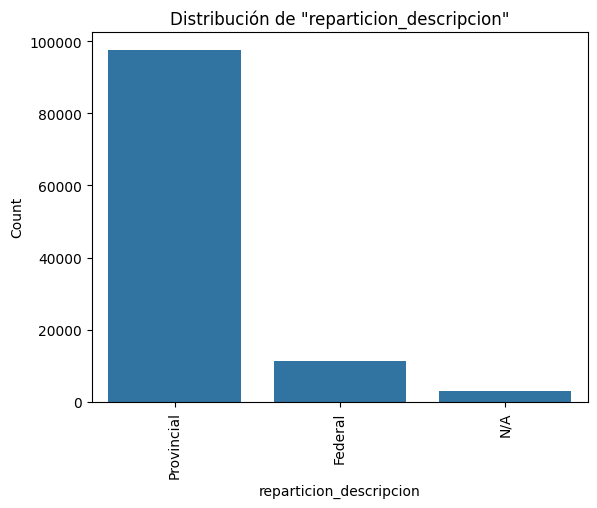

In [ ]:
graficar_distribucion_histograma(data=df_sneep_no_ids_csv.fillna("N/A"), col="reparticion_descripcion", titulo="Distribución de \"reparticion_descripcion\"", xlabel="reparticion_descripcion", rotation=90)

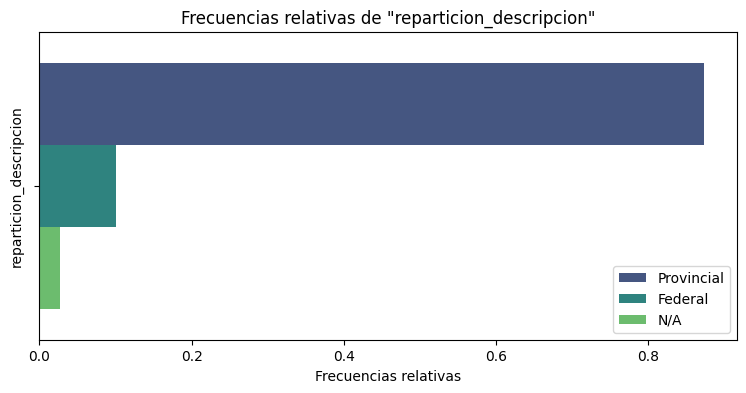

In [ ]:
graficar_frecuencias_relativas(data=df_sneep_no_ids_csv.fillna("N/A"), col="reparticion_descripcion", titulo="Frecuencias relativas de \"reparticion_descripcion\"", xlabel="Frecuencias relativas", ylabel="reparticion_descripcion")

In [ ]:
agrupar_por_columnas_info_aggregation(df_sneep_no_ids_csv, ["reparticion_descripcion"], fn_to_apply=fill_na_as_string_lambda, info_from_col="edad", agg=agg_mean_median_min_max_count)

,Media,Mediana,Valor mínimo,Valor máximo,Cantidad
reparticion_descripcion,,,,,
Federal,34.423214,34.0,0,85,11226
N/A,32.723772,31.0,0,78,3012
Provincial,35.698309,33.0,0,93,97729


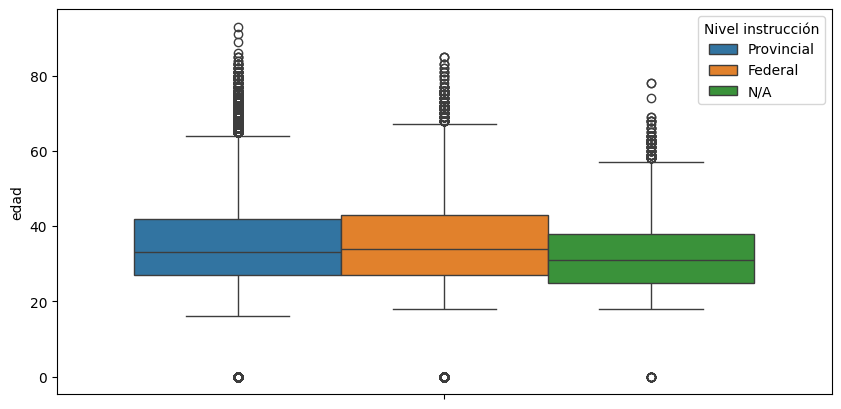

In [ ]:
graficar_boxplot(df_sneep_no_ids_csv.apply(fill_na_as_string_lambda), col="edad", col_division="reparticion_descripcion", titulo="Nivel instrucción", figsize=(10,5))

#### Paso 4.1.7 - Distribución de variable `tuvo_reduccion_pena_descripcion`

La variable `tuvo_reduccion_pena_descripcion` se distribuye de la siguiente manera:

| Valor | Cantidad |
| --- | --- |
| No tuvo reducción de pena  |  60165 |
| NaN                        |  48275 |
| Si - Hasta 6 meses         |   3087 |
| Si - Hasta 1 año           |    254 |
| Si - Mas de 1 año          |    186 |

La moda de esta variable es `No tuvo reducción de pena`, y representa el $53.73$% de los datos.

Además, hay unos registros 48275 con datos nulos (`N/A` o `NaN`).

En este caso, la `Entropía de Shannon` para dicha variable tiene un valor de $0.24$, de un máximo posible de $2.0$. <br/>
En ese caso, una entropía relativamente baja representa que hay poca entropía, lo cual se debe a que hay una clase que domina al resto (`No tuvo reducción de pena`).

También se analizó como se distribuye la variable `edad` en función de la variable `tuvo_reduccion_pena_descripcion`, obteniendo el siguiente resultado:

| tuvo_reduccion_pena_descripcion | Media | Mediana | Valor mínimo | Valor máximo | Cantidad |
| --- | --- | --- | --- | --- | --- |
| N/A | 34.595008 | 33.0 | 0 | 86 | 48275 |
| No tuvo reducción de pena | 36.117178 | 34.0 | 0 | 93 | 60165 |
| Si - Hasta 1 año | 41.366142 | 41.0 | 21 | 72 | 254 |
| Si - Hasta 6 meses | 36.310658 | 34.0 | 0 | 85 | 3087 |
| Si - Mas de 1 año | 43.532258 | 42.5 | 21 | 73 | 186 |

<br/>

> ***Nota***: Recordar que la variable `edad` presenta datos erróneos con valores iguales a cero, además de ciertos *outliers*.

Por último, se muestra un *boxplot* de `edad` en función de `tuvo_reduccion_pena_descripcion`.

In [ ]:
df_sneep_no_ids_csv["tuvo_reduccion_pena_descripcion"].value_counts(dropna=False)

tuvo_reduccion_pena_descripcion
No tuvo reducción de pena    60165
NaN                          48275
Si - Hasta 6 meses            3087
Si - Hasta 1 año               254
Si - Mas de 1 año              186
Name: count, dtype: int64

In [ ]:
total = df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)["tuvo_reduccion_pena_descripcion"].count()
moda = df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)["tuvo_reduccion_pena_descripcion"].mode()[0]

cant_igual_moda = df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)[df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)["tuvo_reduccion_pena_descripcion"] == moda]["tuvo_reduccion_pena_descripcion"].count()
porcentaje_moda = cant_igual_moda*100/total

print(f"La moda de la variable \'tuvo_reduccion_pena_descripcion\' es \'{moda}\', y representa el {porcentaje_moda:.2f}% de los datos (total: {total})")

La moda de la variable 'tuvo_reduccion_pena_descripcion' es 'No tuvo reducción de pena', y representa el 53.73% de los datos (total: 111967)


In [ ]:
obtener_entropia_de_shannon(df_sneep_no_ids_csv, "tuvo_reduccion_pena_descripcion")

Variable "tuvo_reduccion_pena_descripcion"
          Entropía:             0.23959259140693234
          Max entropía posible: 2.0


(0.23959259140693234, 2.0)

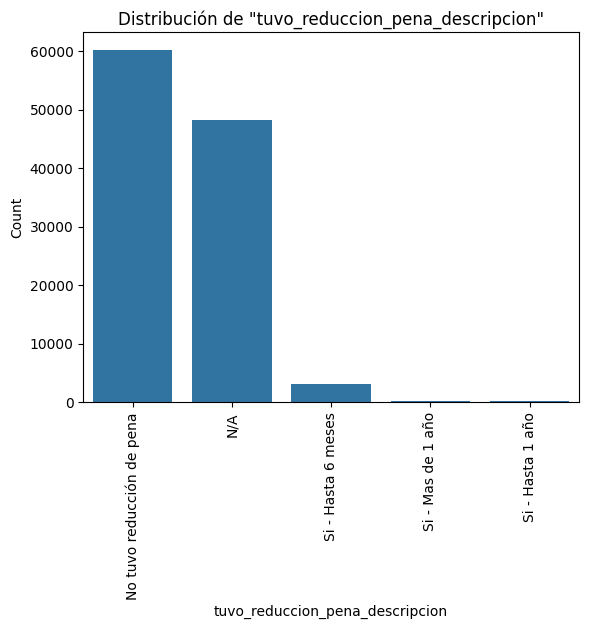

In [ ]:
graficar_distribucion_histograma(data=df_sneep_no_ids_csv.fillna("N/A"), col="tuvo_reduccion_pena_descripcion", titulo="Distribución de \"tuvo_reduccion_pena_descripcion\"", xlabel="tuvo_reduccion_pena_descripcion", rotation=90)

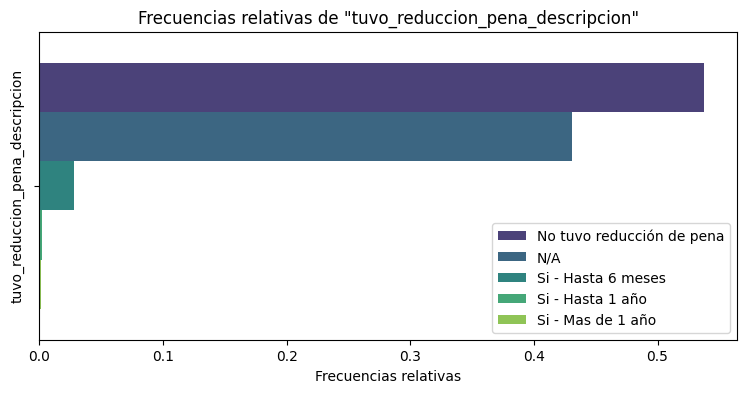

In [ ]:
graficar_frecuencias_relativas(data=df_sneep_no_ids_csv.fillna("N/A"), col="tuvo_reduccion_pena_descripcion", titulo="Frecuencias relativas de \"tuvo_reduccion_pena_descripcion\"", xlabel="Frecuencias relativas", ylabel="tuvo_reduccion_pena_descripcion")

In [ ]:
agrupar_por_columnas_info_aggregation(df_sneep_no_ids_csv, ["tuvo_reduccion_pena_descripcion"], fn_to_apply=fill_na_as_string_lambda, info_from_col="edad", agg=agg_mean_median_min_max_count)

,Media,Mediana,Valor mínimo,Valor máximo,Cantidad
tuvo_reduccion_pena_descripcion,,,,,
N/A,34.595008,33.0,0,86,48275
No tuvo reducción de pena,36.117178,34.0,0,93,60165
Si - Hasta 1 año,41.366142,41.0,21,72,254
Si - Hasta 6 meses,36.310658,34.0,0,85,3087
Si - Mas de 1 año,43.532258,42.5,21,73,186


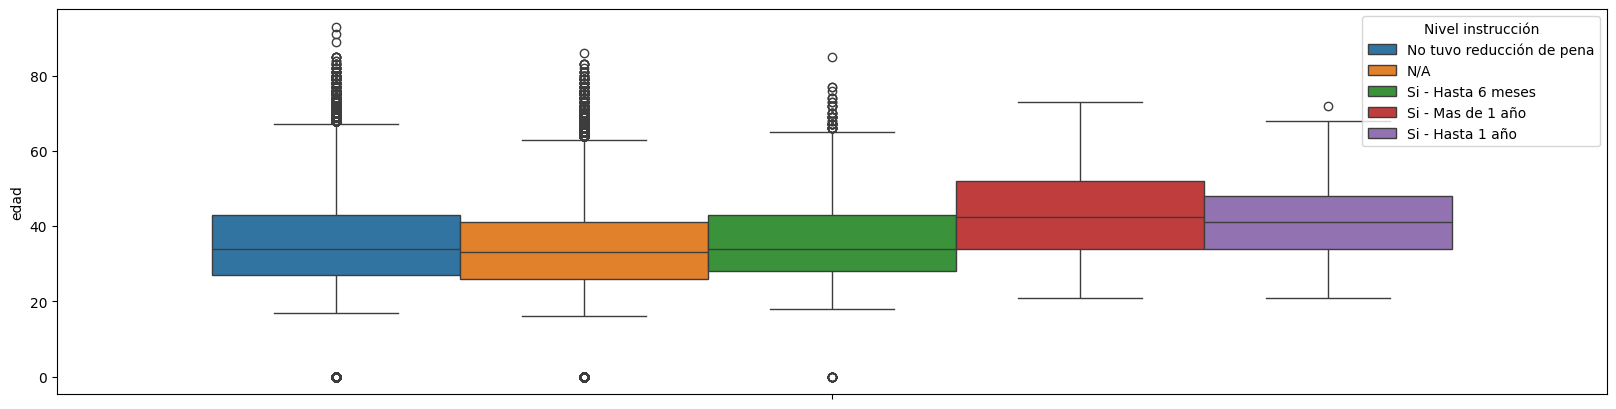

In [ ]:
graficar_boxplot(df_sneep_no_ids_csv.apply(fill_na_as_string_lambda), col="edad", col_division="tuvo_reduccion_pena_descripcion", titulo="Nivel instrucción", figsize=(20,5))

### Paso 4.2 - Agrupamiento de `tuvo_reduccion_pena_descripcion` con otras variables

La variable `tuvo_reduccion_pena_descripcion` es potencialmente aquella sobre la cual se puede plantear un problema de Machine Learning supervisado.

Igualmente, antes de plantear este problema, resulta conveniente analizar como se distribuye dicha variable en conjunto con otras variables del dataset.

Se procede a realizar agrupamiento y análisis de distribuciones de la variable `tuvo_reduccion_pena_descripcion` con:

- genero_descripcion
- ultima_situacion_laboral_descripcion
- situacion_legal_descripcion
- es_reincidente_descripcion

#### 4.2.1 - Agrupamiento de `tuvo_reduccion_pena_descripcion` con `genero_descripcion`

En la siguiente tabla se puede observar la distribución entre las columnas `genero_descripcion` y `tuvo_reduccion_pena_descripcion`.

| genero_descripcion   | tuvo_reduccion_pena_descripcion | Cantidad |
| --- | --- | --- |
| Mujer                | N/A                             |    2391  |
|                      | No tuvo reducción de pena       |    1949  |
|                      | Si - Hasta 1 año                |      18  |
|                      | Si - Hasta 6 meses              |     275  |
|                      | Si - Mas de 1 año               |       9  |
| No Binario           | No tuvo reducción de pena       |       1  |
| Trans Mujer/Travesti | N/A                             |     102  |
|                      | No tuvo reducción de pena       |      66  |
|                      | Si - Hasta 6 meses              |       5  |
| Trans Varón          | N/A                             |      13  |
|                      | No tuvo reducción de pena       |      19  |
|                      | Si - Hasta 6 meses              |       3  |
| Varón                | N/A                             |   45769  |
|                      | No tuvo reducción de pena       |   58130  |
|                      | Si - Hasta 1 año                |     236  |
|                      | Si - Hasta 6 meses              |    2804  |
|                      | Si - Mas de 1 año               |     177  |

Como se puede observar, la mayoría de los casos corresponden a las tuplas `Varón - N/A` (con `N/A` representando a los valores faltantes), y `Varón - No tuvo reducción de pena`, con 45769 y 58130 registros, respectivamente.

Además se presentan un gráfico de barras y el gráfico de *crosstab* en donde se pueden ver dichas distribuciones.

In [ ]:
resultado_agrupamiento = agrupar_por_columnas(df_sneep_no_ids_csv, ["genero_descripcion", "tuvo_reduccion_pena_descripcion"], fill_na_as_string_lambda)

In [ ]:
resultado_agrupamiento.size()

genero_descripcion    tuvo_reduccion_pena_descripcion
Mujer                 N/A                                 2391
                      No tuvo reducción de pena           1949
                      Si - Hasta 1 año                      18
                      Si - Hasta 6 meses                   275
                      Si - Mas de 1 año                      9
No Binario            No tuvo reducción de pena              1
Trans Mujer/Travesti  N/A                                  102
                      No tuvo reducción de pena             66
                      Si - Hasta 6 meses                     5
Trans Varón           N/A                                   13
                      No tuvo reducción de pena             19
                      Si - Hasta 6 meses                     3
Varón                 N/A                                45769
                      No tuvo reducción de pena          58130
                      Si - Hasta 1 año                     236
 

<Axes: title={'center': 'genero_descripcion x tuvo_reduccion_pena_descripcion'}, ylabel='genero_descripcion,tuvo_reduccion_pena_descripcion'>

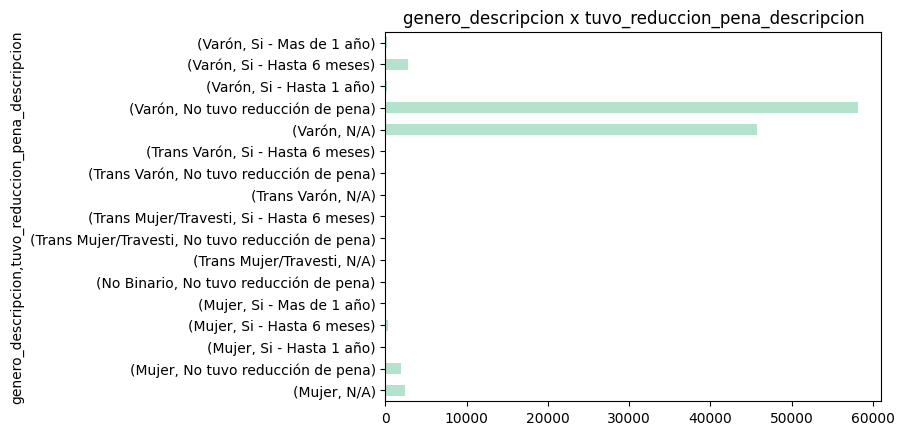

In [ ]:
resultado_agrupamiento.size().plot(kind='barh', colormap='Pastel2' , title='genero_descripcion x tuvo_reduccion_pena_descripcion')

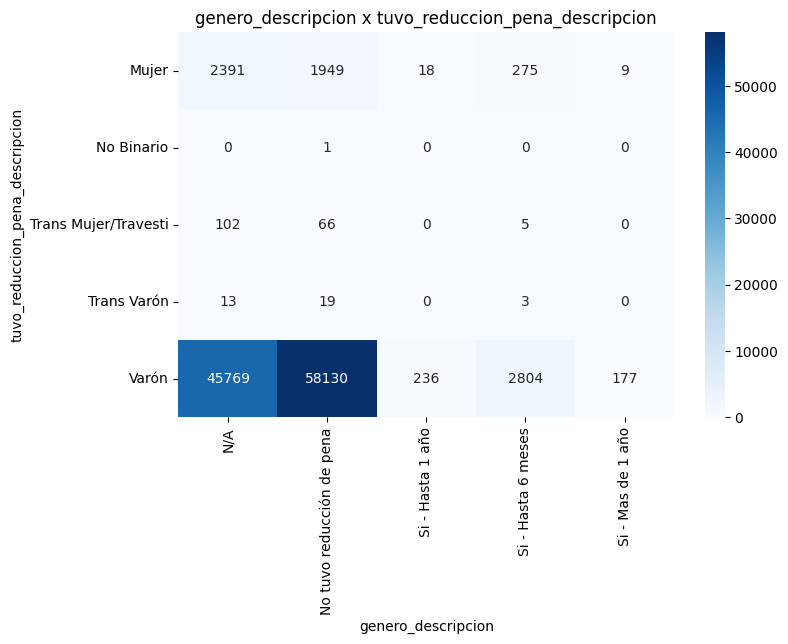

In [ ]:
graficar_crosstab(data=df_sneep_no_ids_csv.apply(fill_na_as_string_lambda), col1="genero_descripcion", col2="tuvo_reduccion_pena_descripcion",
                  titulo="genero_descripcion x tuvo_reduccion_pena_descripcion", xlabel="genero_descripcion",
                  ylabel="tuvo_reduccion_pena_descripcion")

#### 4.2.2 - Agrupamiento de `tuvo_reduccion_pena_descripcion` con `ultima_situacion_laboral_descripcion`

En la siguiente tabla se puede observar la distribución entre las columnas `ultima_situacion_laboral_descripcion` y `tuvo_reduccion_pena_descripcion`.

| ultima_situacion_laboral_descripcion   | tuvo_reduccion_pena_descripcion | Cantidad |
| --- | --- | --- |
| Desocupado/a                       |   N/A                           |     16961 |
|                                    |   No tuvo reducción de pena     |     22272 |
|                                    |   Si - Hasta 1 año              |        60 |
|                                    |   Si - Hasta 6 meses            |       635 |
|                                    |   Si - Mas de 1 año             |        30 |
| N/A                                |   N/A                           |       338 |
|                                    |   No tuvo reducción de pena     |       536 |
|                                    |   Si - Hasta 6 meses            |        13 |
|                                    |   Si - Mas de 1 año             |         2 |
| Trabajador/ra de tiempo completo   |   N/A                           |     13359 |
|                                    |   No tuvo reducción de pena     |     16171 |
|                                    |   Si - Hasta 1 año              |        90 |
|                                    |   Si - Hasta 6 meses            |       766 |
|                                    |   Si - Mas de 1 año             |        63 |
| Trabajador/ra de tiempo parcial    |   N/A                           |     17617 |
|                                    |   No tuvo reducción de pena     |     21186 |
|                                    |   Si - Hasta 1 año              |       104 |
|                                    |   Si - Hasta 6 meses            |      1673 |
|                                    |   Si - Mas de 1 año             |        91 |

A continuación se listan las tuplas con mayores valores:

| ultima_situacion_laboral_descripcion   | tuvo_reduccion_pena_descripcion | Cantidad |
| --- | --- | --- |
| Desocupado/a                       |   N/A                           |     16961 |
|                                    |   No tuvo reducción de pena     |     22272 |
| Trabajador/ra de tiempo completo   |   N/A                           |     13359 |
|                                    |   No tuvo reducción de pena     |     16171 |
| Trabajador/ra de tiempo parcial    |   N/A                           |     17617 |
|                                    |   No tuvo reducción de pena     |     21186 |

Además se presentan un gráfico de barras y el gráfico de *crosstab* en donde se pueden ver dichas distribuciones.

In [ ]:
resultado_agrupamiento = agrupar_por_columnas(df_sneep_no_ids_csv, ["ultima_situacion_laboral_descripcion", "tuvo_reduccion_pena_descripcion"], fill_na_as_string_lambda)

In [ ]:
resultado_agrupamiento.size()

ultima_situacion_laboral_descripcion  tuvo_reduccion_pena_descripcion
Desocupado/a                          N/A                                16961
                                      No tuvo reducción de pena          22272
                                      Si - Hasta 1 año                      60
                                      Si - Hasta 6 meses                   635
                                      Si - Mas de 1 año                     30
N/A                                   N/A                                  338
                                      No tuvo reducción de pena            536
                                      Si - Hasta 6 meses                    13
                                      Si - Mas de 1 año                      2
Trabajador/ra de tiempo completo      N/A                                13359
                                      No tuvo reducción de pena          16171
                                      Si - Hasta 1 año       

<Axes: title={'center': 'ultima_situacion_laboral_descripcion x tuvo_reduccion_pena_descripcion'}, ylabel='ultima_situacion_laboral_descripcion,tuvo_reduccion_pena_descripcion'>

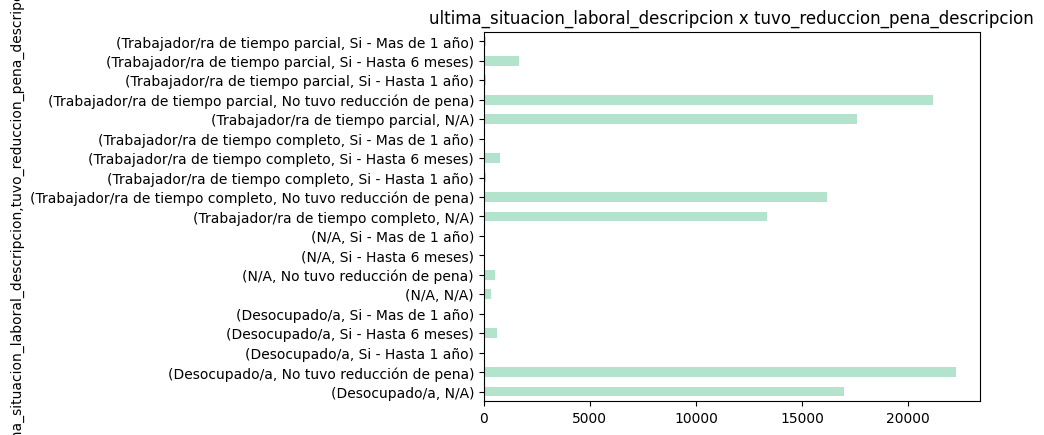

In [ ]:
resultado_agrupamiento.size().plot(kind='barh', colormap='Pastel2' , title='ultima_situacion_laboral_descripcion x tuvo_reduccion_pena_descripcion')

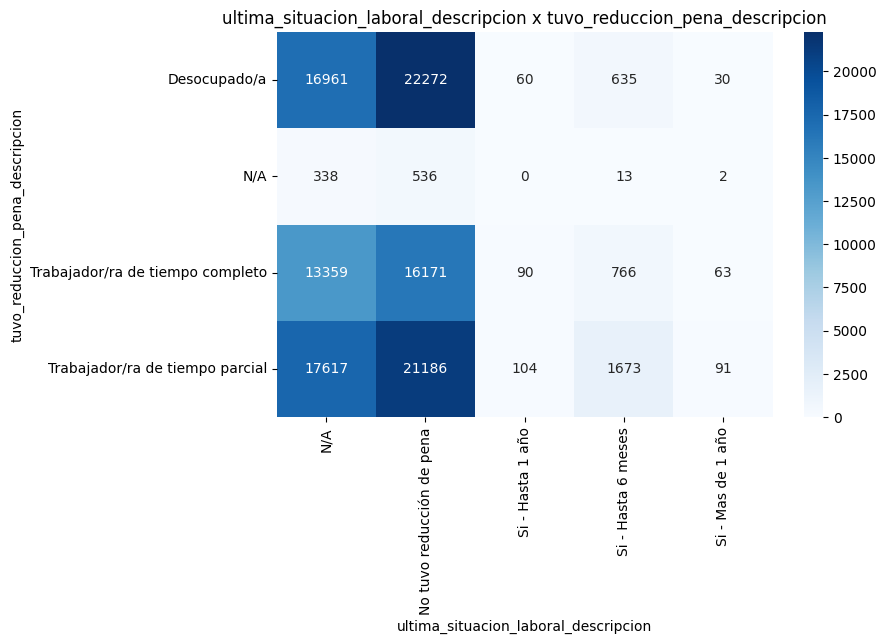

In [ ]:
graficar_crosstab(data=df_sneep_no_ids_csv.apply(fill_na_as_string_lambda), col1="ultima_situacion_laboral_descripcion", col2="tuvo_reduccion_pena_descripcion",
                  titulo="ultima_situacion_laboral_descripcion x tuvo_reduccion_pena_descripcion", xlabel="ultima_situacion_laboral_descripcion",
                  ylabel="tuvo_reduccion_pena_descripcion")

#### 4.2.3 - Agrupamiento de `tuvo_reduccion_pena_descripcion` con `situacion_legal_descripcion`

En la siguiente tabla se puede observar la distribución entre las columnas `situacion_legal_descripcion` y `tuvo_reduccion_pena_descripcion`.

| situacion_legal_descripcion   | tuvo_reduccion_pena_descripcion | Cantidad |
| --- | --- | --- |
| Condenado/a          |        N/A                            |     3660 |
|                      |        No tuvo reducción de pena      |    60165 |
|                      |        Si - Hasta 1 año               |      254 |
|                      |        Si - Hasta 6 meses             |     3087 |
|                      |        Si - Mas de 1 año              |      186 |
| Inimputable          |        N/A                            |      292 |
| Otra situación       |        N/A                            |      864 |
| Procesado/a          |        N/A                            |    43459 |

En este caso se encuentra la particularidad de que los registros con *situación legal* distinta a `Condenado/a` tienen valores nulos en `tuvo_reduccion_pena_descripcion`.<br/>
Esto es totalmente válido y razonable, ya que ***si no hay condena, no habrá nunca una reducción de la pena***.<br/>
Igualmente, hay un caso particular para analizar, ya que hay 3660 `Condenado/a` con `N/A` como `tuvo_reduccion_pena_descripcion`. Este análisis se realizará en secciones posteriores.

Además se presentan un gráfico de barras y el gráfico de *crosstab* en donde se pueden ver dichas distribuciones.

In [118]:
resultado_agrupamiento = agrupar_por_columnas(df_sneep_no_ids_csv, ["situacion_legal_descripcion", "tuvo_reduccion_pena_descripcion"], fill_na_as_string_lambda)

In [119]:
resultado_agrupamiento

situacion_legal_descripcion  tuvo_reduccion_pena_descripcion
Condenado/a                  N/A                                 3660
                             No tuvo reducción de pena          60165
                             Si - Hasta 1 año                     254
                             Si - Hasta 6 meses                  3087
                             Si - Mas de 1 año                    186
Inimputable                  N/A                                  292
Otra situación               N/A                                  864
Procesado/a                  N/A                                43459
dtype: int64

<Axes: title={'center': 'situacion_legal_descripcion x tuvo_reduccion_pena_descripcion'}, ylabel='situacion_legal_descripcion,tuvo_reduccion_pena_descripcion'>

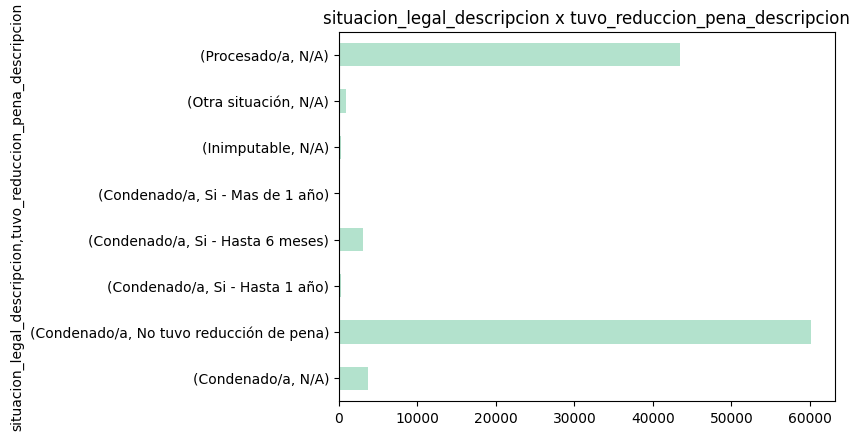

In [ ]:
resultado_agrupamiento.size().plot(kind='barh', colormap='Pastel2' , title='situacion_legal_descripcion x tuvo_reduccion_pena_descripcion')

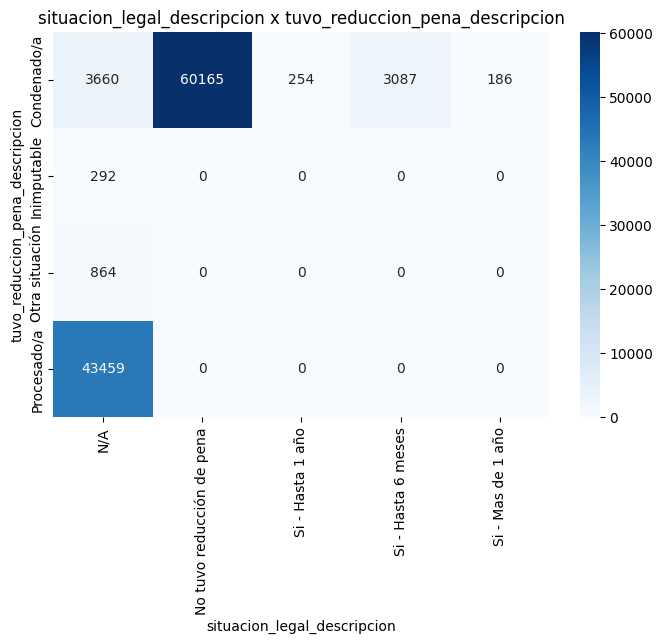

In [ ]:
graficar_crosstab(data=df_sneep_no_ids_csv.apply(fill_na_as_string_lambda), col1="situacion_legal_descripcion", col2="tuvo_reduccion_pena_descripcion",
                  titulo="situacion_legal_descripcion x tuvo_reduccion_pena_descripcion", xlabel="situacion_legal_descripcion",
                  ylabel="tuvo_reduccion_pena_descripcion")

#### 4.2.4 - Agrupamiento de `tuvo_reduccion_pena_descripcion` con `es_reincidente_descripcion`

En la siguiente tabla se puede observar la distribución entre las columnas `es_reincidente_descripcion` y `tuvo_reduccion_pena_descripcion`.

| es_reincidente_descripcion   | tuvo_reduccion_pena_descripcion | Cantidad |
| --- | --- | --- |
| N/A                       |  N/A                            |    45494 |
|                           |  No tuvo reducción de pena      |     2949 |
|                           |  Si - Hasta 6 meses             |      487 |
|                           |  Si - Mas de 1 año              |        1 |
| Primario/a                |  N/A                            |     2170 |
|                           |  No tuvo reducción de pena      |    39628 |
|                           |  Si - Hasta 1 año               |      195 |
|                           |  Si - Hasta 6 meses             |     1677 |
|                           |  Si - Mas de 1 año              |      131 |
| Reincidente (art. 50 CP)  |  N/A                            |      598 |
|                           |  No tuvo reducción de pena      |    11462 |
|                           |  Si - Hasta 1 año               |       38 |
|                           |  Si - Hasta 6 meses             |      593 |
|                           |  Si - Mas de 1 año              |       29 |
| Reiterante                |  N/A                            |       13 |
|                           |  No tuvo reducción de pena      |     6126 |
|                           |  Si - Hasta 1 año               |       21 |
|                           |  Si - Hasta 6 meses             |      330 |
|                           |  Si - Mas de 1 año              |       25 |

En este caso, la tupla (`es_reincidente_descripcion`, `tuvo_reduccion_pena_descripcion`) con mayor cantidad de registros corresponde a (`N/A`, `N/A`), es decir, ambos nulos, con un total de 45494 registros. <br/>
La segunda tupla es (`Primario/a`, `No tuvo reducción de pena`), con 39628 registros.

Además se presentan un gráfico de barras y el gráfico de *crosstab* en donde se pueden ver dichas distribuciones.

In [ ]:
resultado_agrupamiento = agrupar_por_columnas(df_sneep_no_ids_csv, ["es_reincidente_descripcion", "tuvo_reduccion_pena_descripcion"], fill_na_as_string_lambda)

In [ ]:
resultado_agrupamiento.size()

es_reincidente_descripcion  tuvo_reduccion_pena_descripcion
N/A                         N/A                                45494
                            No tuvo reducción de pena           2949
                            Si - Hasta 6 meses                   487
                            Si - Mas de 1 año                      1
Primario/a                  N/A                                 2170
                            No tuvo reducción de pena          39628
                            Si - Hasta 1 año                     195
                            Si - Hasta 6 meses                  1677
                            Si - Mas de 1 año                    131
Reincidente (art. 50 CP)    N/A                                  598
                            No tuvo reducción de pena          11462
                            Si - Hasta 1 año                      38
                            Si - Hasta 6 meses                   593
                            Si - Mas de 1 a

<Axes: title={'center': 'es_reincidente_descripcion x tuvo_reduccion_pena_descripcion'}, ylabel='es_reincidente_descripcion,tuvo_reduccion_pena_descripcion'>

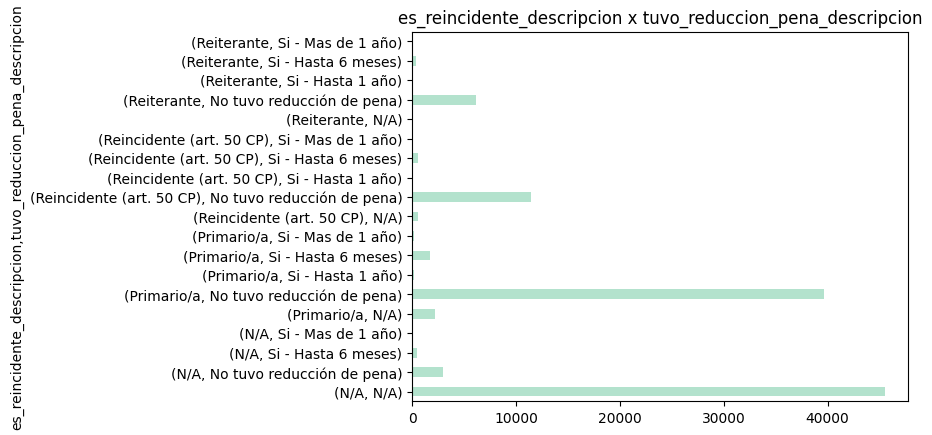

In [ ]:
resultado_agrupamiento.size().plot(kind='barh', colormap='Pastel2' , title='es_reincidente_descripcion x tuvo_reduccion_pena_descripcion')

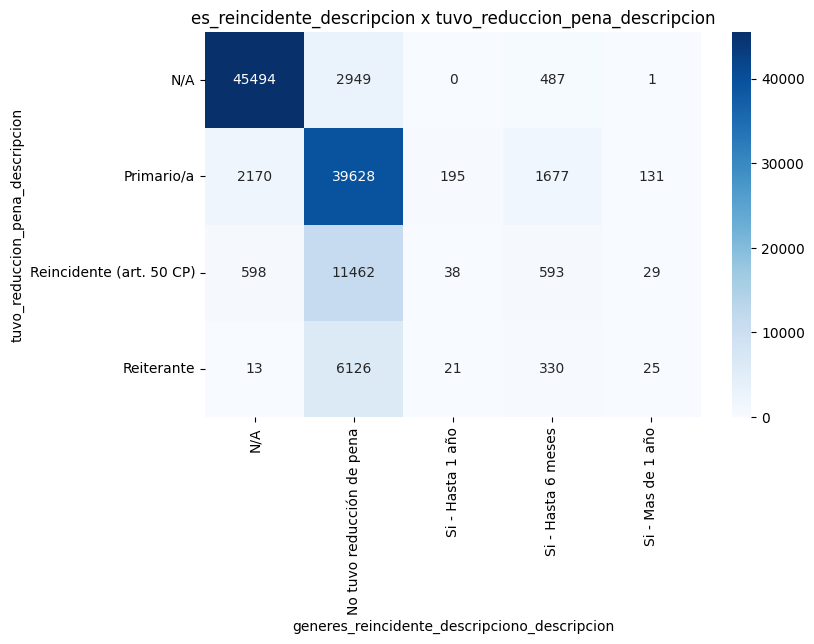

In [ ]:
graficar_crosstab(data=df_sneep_no_ids_csv.apply(fill_na_as_string_lambda), col1="es_reincidente_descripcion", col2="tuvo_reduccion_pena_descripcion",
                  titulo="es_reincidente_descripcion x tuvo_reduccion_pena_descripcion", xlabel="generes_reincidente_descripciono_descripcion",
                  ylabel="tuvo_reduccion_pena_descripcion")

## Paso 5 - Análisis de Errores y valores faltantes

### Paso 5.1 - ¿Cómo afecta el valor `Condenado/a` de la variable `situacion_legal_descripcion` al resto?

Al analizar como se distribuían las variables `tuvo_reduccion_pena_descripcion` y `situacion_legal_descripcion` se encontró la particularidad de que aquellos valores de `situacion_legal_descripcion` distintos a `Condenado/a` tenían todos sus valores nulos (`N/A`) en los registros de `tuvo_reduccion_pena_descripcion`.

El propósito de esta sección es analizar si existen otras variables en donde suceda lo mismo.

Las variables afectadas por el valor `Condenado/a` de la columna `situacion_legal_descripcion` (además de `tuvo_reduccion_pena_descripcion`) son:

- `tipo_condena`
- `es_reincidente_descripcion`
- `tiene_periodo_progresividad_descripcion`
- `tuvo_salidas_transitorias_descripcion`
- `incorporado_reg_semi_libertad_descripcion`
- `participa_programa_pre_libertad`
- `participa_programa_prision_discontinua_descripcion`
- `participa_programa_semi_detencion_descripcion`

#### Paso 5.1.1 - Como afecta `situacion_legal_descripcion` a `tipo_condena`

| situacion_legal_descripcion   | tipo_condena | Cantidad |
| --- | --- | --- |
| Condenado/a        |         0.0   |          62605 |
|                    |         1.0   |           3037 |
|                    |         N/A   |           1710 |
| Inimputable        |         N/A   |            292 |
| Otra situación     |         N/A   |            864 |
| Procesado/a        |         N/A   |          43459 |

#### Paso 5.1.2 - Como afecta `situacion_legal_descripcion` a `es_reincidente_descripcion`

| situacion_legal_descripcion   | es_reincidente_descripcion | Cantidad |
| --- | --- | --- |
| Condenado/a          |        N/A                       |     4316 |
|                      |        Primario/a                |    43801 |
|                      |        Reincidente (art. 50 CP)  |    12720 |
|                      |        Reiterante                |     6515 |
| Inimputable          |        N/A                       |      292 |
| Otra situación       |        N/A                       |      864 |
| Procesado/a          |        N/A                       |    43459 |


#### Paso 5.1.3 - Como afecta `situacion_legal_descripcion` a `tiene_periodo_progresividad_descripcion`

| situacion_legal_descripcion   | tiene_periodo_progresividad_descripcion | Cantidad |
| --- | --- | --- |
| Condenado/a          |        N/A                                 |        2558 |
|                      |        No se aplica ninguna                |       12064 |
|                      |        Período de libertad condicional     |         972 |
|                      |        Período de observación              |        5469 |
|                      |        Período de prueba                   |        6944 |
|                      |        Período de tratamiento              |       34890 |
|                      |        Se aplica otra caracterización      |        4455 |
| Inimputable          |        N/A                                 |         292 |
| Otra situación       |        N/A                                 |         864 |
| Procesado/a          |        N/A                                 |       43459 |


#### Paso 5.1.4 - Como afecta `situacion_legal_descripcion` a `tuvo_salidas_transitorias_descripcion`

| situacion_legal_descripcion   | tuvo_salidas_transitorias_descripcion | Cantidad |
| --- | --- | --- |
| Condenado/a        |          N/A                                |       3952 |
|                    |          No le fueron otorgadas             |      59074 |
|                    |          Revocadas durante el último año    |        188 |
|                    |          Si - goza de salidas transitorias  |       3993 |
|                    |          Suspendidas durante el último año  |        145 |
| Inimputable        |          N/A                                |        292 |
| Otra situación     |          N/A                                |        864 |
| Procesado/a        |          N/A                                |      43459 |

#### Paso 5.1.5 - Como afecta `situacion_legal_descripcion` a `incorporado_reg_semi_libertad_descripcion`

| situacion_legal_descripcion   | incorporado_reg_semi_libertad_descripcion | Cantidad |
| --- | --- | --- |
| Condenado/a       |           N/A                                               |   1749 |
|                   |           No está incorporado/a al régimen de semilibertad  |  64152 |
|                   |           Revocado durante el último año                    |    209 |
|                   |           Si está incorporado/a                             |   1214 |
|                   |           Suspendido/a durante el último año                |     28 |
| Inimputable       |           N/A                                               |    292 |
| Otra situación    |           N/A                                               |    864 |
| Procesado/a       |           N/A                                               |  43459 |

#### Paso 5.1.6 - Como afecta `situacion_legal_descripcion` a `participa_programa_pre_libertad`

| situacion_legal_descripcion   | participa_programa_pre_libertad | Cantidad |
| --- | --- | --- |
| Condenado/a           |       0.0               |                 56267 |
|                       |       1.0               |                  7987 |
|                       |       N/A               |                  3098 |
| Inimputable           |       N/A               |                   292 |
| Otra situación        |       N/A               |                   864 |
| Procesado/a           |       N/A               |                 43459 |


#### Paso 5.1.7 - Como afecta `situacion_legal_descripcion` a `participa_programa_prision_discontinua_descripcion`

| situacion_legal_descripcion   | participa_programa_prision_discontinua_descripcion | Cantidad |
| --- | --- | --- |
| Condenado/a                 | N/A                                                 |   3552 |
|                             | No está incorporado/a                               |  63717 |
|                             | Renuncia del interno/a durante el último año        |      3 |
|                             | Revocada durante el último año                      |      3 |
|                             | Si está incorporado/a                               |     77 |
| Inimputable                 | N/A                                                 |    292 |
| Otra situación              | N/A                                                 |    864 |
| Procesado/a                 | N/A                                                 |  43459 |

#### Paso 5.1.8 - Como afecta `situacion_legal_descripcion` a `participa_programa_semi_detencion_descripcion`

| situacion_legal_descripcion   | participa_programa_semi_detencion_descripcion | Cantidad |
| --- | --- | --- |
| Condenado/a         |         N/A                                     |          2850 |
|                     |         No tiene semidetención                  |         64456 |
|                     |         Revocada durante el último año          |             6 |
|                     |         Si. Prisión Diurna                      |            21 |
|                     |         Si. Prisión Nocturna                    |            19 |
| Inimputable         |         N/A                                     |           292 |
| Otra situación      |         N/A                                     |           864 |
| Procesado/a         |         N/A                                     |         43459 |

#### Código para la resolución del paso 5.1

In [590]:
# Creamos un nuevo dataframe, en donde llenamos los datos faltantes con el string "N/A".
df_no_id_na_as_string = df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)

In [ ]:
# Se crea un dataframe que solo contiene los registros donde "situacion_legal_descripcion" es igual a "Condenado/a"
df_no_ids_solo_condenados = df_no_id_na_as_string[df_no_id_na_as_string["situacion_legal_descripcion"] == "Condenado/a"]

In [600]:
# Se crea un dataframe que solo contiene los registros donde "situacion_legal_descripcion" es distinto a "Condenado/a"
df_no_ids_NO_condenados = df_no_id_na_as_string[df_no_id_na_as_string["situacion_legal_descripcion"] != "Condenado/a"]

In [593]:
columnas_a_analizar = df_no_ids_solo_condenados.columns.tolist()
columnas_a_analizar.remove("situacion_legal_descripcion")

In [611]:
# En esta sección se encuentran a las columnas afectadas
col_afectadas = []
for col in columnas_a_analizar:
    no_condenados_unique = df_no_ids_NO_condenados[col].unique().tolist()
    condenados_unique = df_no_ids_solo_condenados[col].unique().tolist()

    if set(no_condenados_unique) == set(["N/A"]):
        print(f"""Columna Afectada: {col}
    Valores únicos para \"Condenado/a\": {condenados_unique}
    Valores únicos para NO \"Condenado/a\": {no_condenados_unique}""")
        col_afectadas.append(col)

Columna Afectada: tipo_condena
    Valores únicos para "Condenado/a": [0.0, 1.0, 'N/A']
    Valores únicos para NO "Condenado/a": ['N/A']
Columna Afectada: es_reincidente_descripcion
    Valores únicos para "Condenado/a": ['Primario/a', 'Reincidente (art. 50 CP)', 'Reiterante', 'N/A']
    Valores únicos para NO "Condenado/a": ['N/A']
Columna Afectada: tiene_periodo_progresividad_descripcion
    Valores únicos para "Condenado/a": ['No se aplica ninguna', 'Período de prueba', 'Período de tratamiento', 'N/A', 'Se aplica otra caracterización', 'Período de observación', 'Período de libertad condicional']
    Valores únicos para NO "Condenado/a": ['N/A']
Columna Afectada: tuvo_salidas_transitorias_descripcion
    Valores únicos para "Condenado/a": ['No le fueron otorgadas', 'Revocadas durante el último año', 'N/A', 'Si - goza de salidas transitorias', 'Suspendidas durante el último año']
    Valores únicos para NO "Condenado/a": ['N/A']
Columna Afectada: incorporado_reg_semi_libertad_descrip

In [615]:
col_afectadas

['tipo_condena',
 'es_reincidente_descripcion',
 'tiene_periodo_progresividad_descripcion',
 'tuvo_salidas_transitorias_descripcion',
 'incorporado_reg_semi_libertad_descripcion',
 'participa_programa_pre_libertad',
 'participa_programa_prision_discontinua_descripcion',
 'participa_programa_semi_detencion_descripcion',
 'tuvo_reduccion_pena_descripcion']

In [ ]:
# Mostramos como se distribuyen las variables, al agrupar por columnas
for col in col_afectadas:
    resultado_agrupamiento = agrupar_por_columnas(df_sneep_no_ids_csv, ["situacion_legal_descripcion", col], fill_na_as_string_lambda)
    print("================================================================================")
    print(resultado_agrupamiento.size())

situacion_legal_descripcion  tipo_condena
Condenado/a                  0.0             62605
                             1.0              3037
                             N/A              1710
Inimputable                  N/A               292
Otra situación               N/A               864
Procesado/a                  N/A             43459
dtype: int64
situacion_legal_descripcion  es_reincidente_descripcion
Condenado/a                  N/A                            4316
                             Primario/a                    43801
                             Reincidente (art. 50 CP)      12720
                             Reiterante                     6515
Inimputable                  N/A                             292
Otra situación               N/A                             864
Procesado/a                  N/A                           43459
dtype: int64
situacion_legal_descripcion  tiene_periodo_progresividad_descripcion
Condenado/a                  N/A              

### Paso 5.2 - Buscando casos similares a la variable `situacion_legal_descripcion`

Al buscar casos similares a la variable `situacion_legal_descripcion` se encontró que la única variable donde sucede algo similar es `genero_descripcion`:

| Variable que causa faltantes | Valor que causa faltantes | Variable afectada | Cantidad de nulos totales en variable afectada | Cantidad de nulos afectados |
| --- | --- | --- | --- | --- |
| `genero_descripcion` | `Mujer` | `mujer_tiene_hijos_intramuro` | 107325 | 107325 (100%) |

#### Código para la resolución del paso 5.2

> NOTA: una celda de esta sección suele demorar 10 minutos en ejecutarse

In [41]:
# Creamos un nuevo dataframe, en donde llenamos los datos faltantes con el string "N/A".
df_no_id_na_as_string = df_sneep_no_ids_csv.apply(fill_na_as_string_lambda)

In [42]:
to_remove = ["provincia_sneep_id", "edad", "ultima_provincia_residencia_sneep_id", "fecha_detencion", "fecha_condenado", "duracion_condena_anios", "duracion_condena_meses", "duracion_condena_rango", "provincia_id", "ultima_provincia_residencia_id"]
columnas_de_interes = df_no_id_na_as_string.columns.tolist()

for x in to_remove:
    columnas_de_interes.remove(x)

In [ ]:
# NOTA: esta sección suele demorar 10 min en ejecutarse
# Se "cruzan" todos los valores de columnas categóricas entre sí, para determinar si afecta en la cantidad de nulos totales o no.
for columna_interes in columnas_de_interes:
    col_val_unicos = df_no_id_na_as_string[columna_interes].unique()

    for val_unico in col_val_unicos:
        df_SI_val_unico = df_no_id_na_as_string[df_no_id_na_as_string[columna_interes] == val_unico]
        df_NO_val_unico = df_no_id_na_as_string[df_no_id_na_as_string[columna_interes] != val_unico]

        subcolumnas = df_SI_val_unico.columns.tolist()
        subcolumnas.remove(columna_interes)

        for subcol in subcolumnas:
            NO_val_unique = df_NO_val_unico[subcol].unique().tolist()
            SI_val_unique = df_SI_val_unico[subcol].unique().tolist()

            if set(NO_val_unique) == set(["N/A"]):
                na_in_no_val_unico = df_NO_val_unico[df_NO_val_unico[subcol] == "N/A"][subcol].count()
                na_in_si_val_unico = df_SI_val_unico[df_SI_val_unico[subcol] == "N/A"][subcol].count()
                na_totales = df_no_id_na_as_string[df_no_id_na_as_string[subcol] == "N/A"][subcol].count()
                print(f"""========================================
                    Columna que afecta: {columna_interes}
                    Valor que afecta: {val_unico}
                    Columna Afectada: {subcol}
                    NA totales: {na_totales}
                    NA afectados x desigual valor único: {na_in_no_val_unico}
                    NA afectados x igual valor único: {na_in_no_val_unico}""")

                    Columna que afecta: genero_descripcion
                    Valor que afecta: Mujer
                    Columna Afectada: mujer_tiene_hijos_intramuro
                    NA totales: 107325
                    NA afectados x desigual valor único: 107325
                    NA afectados x igual valor único: 107325
                    Columna que afecta: situacion_legal_descripcion
                    Valor que afecta: Condenado/a
                    Columna Afectada: tipo_condena
                    NA totales: 46325
                    NA afectados x desigual valor único: 44615
                    NA afectados x igual valor único: 44615
                    Columna que afecta: situacion_legal_descripcion
                    Valor que afecta: Condenado/a
                    Columna Afectada: es_reincidente_descripcion
                    NA totales: 48931
                    NA afectados x desigual valor único: 44615
                    NA afectados x igual valor único:

In [120]:
df_sneep_no_ids_csv["mujer_tiene_hijos_intramuro"].isna().sum()

107325

In [121]:
df_sneep_no_ids_csv[df_sneep_no_ids_csv["genero_descripcion"] == "Mujer"]["mujer_tiene_hijos_intramuro"].isna().sum()

0

In [122]:
df_sneep_no_ids_csv[df_sneep_no_ids_csv["genero_descripcion"] != "Mujer"]["mujer_tiene_hijos_intramuro"].isna().sum()

107325

### Paso 5.3 - Clasificación de valores faltantes - Variables categóricas

En la siguiente tabla se detallan la cantidad de datos faltantes y la causa en las variables categóricas:


| Columna | Cantidad de datos faltantes | Tipo de causa de datos faltantes | Comentarios |
| --- | --- | --- | --- |
| provincia_descripcion                               |       0 | MCAR | - |
| establecimiento_descripcion                         |    3012 | MCAR | - |
| genero_descripcion                                  |       0 | MCAR | - |
| nacionalidad_descripcion                            |     721 | MCAR | - |
| estado_civil_descripcion                            |    2891 | MCAR | - |
| nivel_instruccion_descripcion                       |    7737 | MCAR | - |
| ultima_situacion_laboral_descripcion                |     889 | MCAR | - |
| capacitacion_laboral_al_ingresar_descripcion        |    4205 | MCAR | - |
| ultimo_lugar_residencia_descripcion                 |      65 | MCAR | - |
| ultima_provincia_residencia_descripcion             |     591 | MCAR | - |
| jurisdiccion_descripcion                            |      12 | MCAR | - |
| situacion_legal_descripcion                         |       0 | MCAR | - |
| establecimiento_procedencia_descripcion             |    1900 | MCAR | - |
| delito1_descripcion                                 |     590 | MCAR | - |
| delito2_descripcion                                 |   87909 | MAR | Valores nulos son correctos, ya que no necesariamente puede haber más de un delito (`delito1_descripcion`) |
| delito3_descripcion                                 |  105385 | MAR | Valores nulos son correctos, ya que no necesariamente puede haber más de un delito (`delito1_descripcion`) |
| delito4_descripcion                                 |  110104 | MAR | Valores nulos son correctos, ya que no necesariamente puede haber más de un delito (`delito1_descripcion`) |
| delito5_descripcion                                 |  111446 | MAR | Valores nulos son correctos, ya que no necesariamente puede haber más de un delito (`delito1_descripcion`) |
| horas_trabajo_remunerado_descripcion                |     423 | MCAR | - |
| participacion_programa_laboral                      |    5174 | MCAR | - |
| participacion_programa_educativo_descripcion        |    4179 | MCAR | - |
| participacion_actividades_deportivas                |    2227 | MCAR | - |
| recibio_atencion_medica_ult_anio                    |       0 | MCAR | - |
| recibio_atencion_medica_ult_anio_descripcion        |    4819 | MCAR | - |
| recibio_visitas_ultimo_anio                         |    2812 | MCAR | - |
| participo_alteracion_orden_ult_anio_descripcion     |    1838 | MCAR | - |
| tipo_infraccion_disciplinaria_descripcion           |    1589 | MCAR | - |
| sancion_aplicada_descripcion                        |   95702 | MCAR | - |
| calificacion_conducta_descripcion                   |    3737 | MCAR | - |
| tentativa_fugas_evasiones_descripcion               |     227 | MCAR | - |
| tentativa_suicidio                                  |       0 | MCAR | - |
| fue_lesionado_descripcion                           |     665 | MCAR | - |
| tipo_condena                                        |   46325 | MAR | 96.31% de faltantes se deben a valores distintos de `Condenado/a` de la variable `situacion_legal_descripcion` |
| es_reincidente_descripcion                          |   48931 | MAR | 91.18% de faltantes se deben a valores distintos de `Condenado/a` de la variable `situacion_legal_descripcion` |
| tiene_periodo_progresividad_descripcion             |   47173 | MAR | 94.58% de faltantes se deben a valores distintos de `Condenado/a` de la variable `situacion_legal_descripcion` |
| reparticion_descripcion                             |    3012 | MCAR | - |
| tuvo_salidas_transitorias_descripcion               |   48567 | MAR | 91.86% de faltantes se deben a valores distintos de `Condenado/a` de la variable `situacion_legal_descripcion` |
| incorporado_reg_semi_libertad_descripcion           |   46364 | MAR | 96.23% de faltantes se deben a valores distintos de `Condenado/a` de la variable `situacion_legal_descripcion` |
| participa_programa_pre_libertad                     |   47713 | MAR | 93.5% de faltantes se deben a valores distintos de `Condenado/a` de la variable `situacion_legal_descripcion` |
| participa_programa_prision_discontinua_descripcion  |   48167 | MAR | 92.63% de faltantes se deben a valores distintos de `Condenado/a` de la variable `situacion_legal_descripcion` |
| participa_programa_semi_detencion_descripcion       |   47465 | MAR | 94% de faltantes se deben a valores distintos de `Condenado/a` de la variable `situacion_legal_descripcion` |
| tuvo_reduccion_pena_descripcion                     |   48275 | MAR | 92.41% de faltantes se deben a valores distintos de `Condenado/a` de la variable `situacion_legal_descripcion` |
| mujer_tiene_hijos_intramuro                         |  107325 | MAR | 100% de faltantes se deben a valores distintos de `Mujer` de la variable `genero_descripcion` |

Como se puede observar en la tabla, casi todos los casos clasificados como `MAR` (a excepción de la variable `mujer_tiene_hijos_intramuro`) tienen un porcentaje superior al 90% de datos faltantes a causa de la variable `situacion_legal_descripcion`, más precisamente, a un valor distinto a `Condenado/a`.

Esto indica que, para cada variable, tenemos *dos tipos de nulos*:
- `MAR`: Causados por valores distintos a `Condenado/a` de `situacion_legal_descripcion`. Estos no necesariamente deben ser tratados en pasos posteriores, ya que corresponden que sean nulos. Por ejemplo, es correcto que una persona que no haya sido condenada no tenga un valor en la columna `tipo_condena`
- `MCAR`: corresponde a los registros que tienen valor `Condenado/a` de `situacion_legal_descripcion`. Estos posiblemente sean tratados en pasos posteriores. Por ejemplo, imputándolos mediante el valor de moda de dicha columna (para los `Condenado/a`s).

Respecto al resto de las variables tipo `MCAR`, estos son correctos, y deberían imputarse en futuras etapas.

Por último, se menciona que las variables `delito2_descripcion`, `delito3_descripcion`, `delito4_descripcion` y `delito5_descripcion` tienen faltantes del tipo `MCAR`, los cuales se deben a que una persona no necesariamente comete más de un delito (`delito1_descripcion`). Estos valores son correctos, y por lo tanto *NO* deben ser imputados en futuras etapas.

#### Código para la resolución del paso 5.3

In [123]:
df_solo_categoricas = df_sneep_no_ids_csv.drop(columns = to_remove)

In [124]:
df_solo_categoricas.isna().sum()

provincia_descripcion                                      0
establecimiento_descripcion                             3012
genero_descripcion                                         0
nacionalidad_descripcion                                 721
estado_civil_descripcion                                2891
nivel_instruccion_descripcion                           7737
ultima_situacion_laboral_descripcion                     889
capacitacion_laboral_al_ingresar_descripcion            4205
ultimo_lugar_residencia_descripcion                       65
ultima_provincia_residencia_descripcion                  591
jurisdiccion_descripcion                                  12
situacion_legal_descripcion                                0
establecimiento_procedencia_descripcion                 1900
delito1_descripcion                                      590
delito2_descripcion                                    87909
delito3_descripcion                                   105385
delito4_descripcion     

### Paso 5.4 - Clasificación de valores faltantes - Variables numéricas

| Variable | Cantidad de datos nulos | Tipo de causa de datos faltantes |Detalles |
| --- | --- | --- | --- |
| `Edad` | 1145 | `MCAR` | Parecería ser un error en la carga de datos. No se encontraron patrones en estos casos |
| `duracion_condena_anios` | 50324 | `MAR` | 88.66% de faltantes se deben a valores distintos de `Condenado/a` de la variable `situacion_legal_descripcion` |
| `duracion_condena_meses` | 87374 | `MAR` | 51.06% de faltantes se deben a valores distintos de `Condenado/a` de la variable `situacion_legal_descripcion` |

Como se puede observar en la tabla, valores distintos de `Condenado/a` de la variable `situacion_legal_descripcion` afectan a las siguientes variables:
- `duracion_condena_anios`: 88.66% de valores afectados. Tipo: `MAR`.
- `duracion_condena_meses`: 51.06% de valores afectados. Tipo: `MAR`.

El resto de los valores para ambas variables parecerían ser errores de carga de datos, ya que hay un total de 50324 registros con valores cero en `duracion_condena_anios` y `duracion_condena_meses`.

#### Código para la resolución del paso 5.4

In [129]:
df_condenados = df_sneep_no_ids_csv[df_sneep_no_ids_csv["situacion_legal_descripcion"] == "Condenado/a"]

In [132]:
total_condena_cero_anios = df_sneep_no_ids_csv[df_sneep_no_ids_csv["duracion_condena_anios"] == 0]["duracion_condena_anios"].count()
condenados_con_condena_cero_anios = df_condenados[df_condenados["duracion_condena_anios"] == 0]["duracion_condena_anios"].count()

print(f"""
      Variable: \"duracion_condena_anios\"
      Cantidad de valores cero: {total_condena_cero_anios}
      Cantidad de valores cero para \"Condenado/a\": {condenados_con_condena_cero_anios}
      Porcentaje de ceros para NO \"Condenado/a": {100-(condenados_con_condena_cero_anios*100/total_condena_cero_anios)}
    """)


      Variable: "duracion_condena_anios"
      Cantidad de valores cero: 50324
      Cantidad de valores cero para "Condenado/a": 5709
      Porcentaje de ceros para NO "Condenado/a": 88.65551228042285
    


In [134]:
total_condena_cero_meses = df_sneep_no_ids_csv[df_sneep_no_ids_csv["duracion_condena_meses"] == 0]["duracion_condena_meses"].count()
condenados_con_condena_cero_meses = df_condenados[df_condenados["duracion_condena_meses"] == 0]["duracion_condena_meses"].count()

print(f"""
      Variable: \"duracion_condena_meses\"
      Cantidad de valores cero: {total_condena_cero_meses}
      Cantidad de valores cero para \"Condenado/a\": {condenados_con_condena_cero_meses}
      Porcentaje de ceros para NO \"Condenado/a": {100-(condenados_con_condena_cero_meses*100/total_condena_cero_meses)}
    """)


      Variable: "duracion_condena_meses"
      Cantidad de valores cero: 87374
      Cantidad de valores cero para "Condenado/a": 42759
      Porcentaje de ceros para NO "Condenado/a": 51.0621008538009
    


In [155]:
condena_meses_cero = df_sneep_no_ids_csv["duracion_condena_meses"] == 0
condena_anios_cero = df_sneep_no_ids_csv["duracion_condena_anios"] == 0
ambos_cero = condena_meses_cero.tolist() and condena_anios_cero.tolist()
ambos_cero_cantidad = df_sneep_no_ids_csv[ambos_cero]["duracion_condena_meses"].count()

print(f"Cantidad de registros con valores cero en \"duracion_condena_anios\" y \"duracion_condena_meses\": {ambos_cero_cantidad}")

Cantidad de registros con valores cero en "duracion_condena_anios" y "duracion_condena_meses": 50324


## Conclusiones y planteo de problema de Machine Learning Supervisado

### Dimensiones del dataset

El dataset elegido, `Sistema Nacional de Estadísticas sobre Ejecución de la Pena` para el año 2023, se caracteriza por tener *111967* filas y *86* columnas. <br/>

De esas 86 columnas, se encontró que 36 corresponden a columnas del tipo `ID`s, la cuales pueden ser descartadas, quedando en una primera instancia 50 columnas. <br />
De esas 50 columnas restantes, se pueden eliminar:
- `censo_anio`: todos los valores son *2023*.
- `fecha_detencion`: no se encontró información útil respecto a esta variable.
- `fecha_condenado`: no se encontró información útil respecto a esta variable.
- `duracion_condena_rango`: Corresponde a un rango de datos, pero se desconoce que representa cada valor del rango (solo se tienen los valores de *id* del rango).

De esta manera, quedan 46 columnas para trabajar en el dataset.

### Análisis de variables numéricas

De las 46 columnas útiles del dataset, se encontraron tres columnas numéricas, con las siguientes características:

- `edad`
  - $3609$ valores atípicos, según rango intercuartil
    - $1145$ corresponden a valores nulos (edad igual a cero), del tipo `MCAR`.
    - $2464$ son valores válidos, siendo el máximo 93 años.
  - Tipo de Kurtosis: *Leptocúrtica*.
  - Tipo de asimetría: *Positiva*.
- `duracion_condena_anios`
  - $50324$ valores nulos del tipo `MAR` (88.66% del total de faltantes).
    - Estos faltantes se deben a valores distintos de `Condenado/a` de la variable `situacion_legal_descripcion` 
  - Tipo de Kurtosis: *Leptocúrtica*.
  - Tipo de asimetría: *Positiva*.
- `duracion_condena_meses`
  - $87374$ valores nulos del tipo `MAR` (51.06% del total de faltantes).
    - Estos faltantes se deben a valores distintos de `Condenado/a` de la variable `situacion_legal_descripcion`   
  - Tipo de Kurtosis: *Leptocúrtica*.
  - Tipo de asimetría: *Positiva*.

Posibles tratamientos y operaciones sobre estas variables:
- `edad`
  - Imputación de valores iguales a cero.
- `duracion_condena_anios`
  - Los faltantes del tipo `MAR` deberían dejarse tal cual están, ya que son *correctos* (personas sin condena no deberían tener valores en esta columna).
  - Los faltantes del tipo `MCAR` (11.33%) deberían imputarse de alguna manera en futuras etapas.
- `duracion_condena_meses`
  - Los faltantes del tipo `MAR` deberían dejarse tal cual están, ya que son *correctos* (personas sin condena no deberían tener valores en esta columna).
  - En cuanto a los `MCAR` (48.94%) deberían de imputarse de alguna manera en futuras etapas.

### Análisis de variables categóricas

En total hay 43 columnas categóricas.

La columna `situacion_legal_descripcion` es una de las más interesantes
- Tiene los siguientes valores:
    - `Condenado/a`, `Procesado/a`, `Inimputable`, `Otra situación`
- No presenta valores nulos 
- La moda de esta variable es `Condenado/a`, y representa el $60.15$% de los datos.
- Valores disntitos a `Condenado/a` generan muchos valores nulos (`MAR`) en las siguientes variables:
    - `tipo_condena`
    - `es_reincidente_descripcion`
    - `tiene_periodo_progresividad_descripcion`
    - `tuvo_salidas_transitorias_descripcion`
    - `incorporado_reg_semi_libertad_descripcion`
    - `participa_programa_pre_libertad`
    - `participa_programa_prision_discontinua_descripcion`
    - `participa_programa_semi_detencion_descripcion`
    - `tuvo_reduccion_pena_descripcion`

Estos valores nulos de tipo `MAR` no deberían imputarse, ya que son correctos. Por ejemplo, una persona que no fue condenada no debería tener valores en la columna `tipo_condena`.
Igualmente, algunas de esas variables poseen valores nulos para los casos que si son `Condenado/a` (`MCAR`), los cuales si deben ser imputados de alguna manera en futuras etapas (ejemplo, mediante la moda).

Algo similar sucede con la variable `genero_descripcion` y el valor `mujer`, que genera datos faltantes del tipo `MAR` en la variable `mujer_tiene_hijos_intramuro`. De la misma manera, estos faltantes de tipo `MAR` no deben imputarse, ya que son correctos.

Algo importante a resaltar es que hay variables que están desbalanceadas. Algunas de ellas son:
- `situacion_legal_descripcion`, cuya moda es `Condenado/a` y representa el $60.15$% de los datos.
- `genero_descripcion`, cuya moda es `Varón` y representa el $95.67$% de los datos.
- `reparticion_descripcion`, cuya moda es `Provincial` y representa el $87.28$% de los datos.
- `tuvo_reduccion_pena_descripcion`, cuya moda es `No tuvo reducción de pena` y representa el $53.73$% de los datos.

### Planteo de problema de Machine Learning supervisado

Ya analizado el dataset, se propone el siguiente problema de *Machine Learning* supervisado:

- **Tipo de problema**: *Clasificación*
- **Variable target**: *tuvo_reduccion_pena_descripcion*
  - Clasificar en `No tuvo reducción de pena`, `Si - Hasta 6 meses`, `Si - Mas de 1 año`, `Si - Hasta 1 año`
- **Desafíos**
  - Variable target desbalanceada.
    - La mayoría de los casos corresponden al valor `No tuvo reducción de pena`.
  - Variable target con nulos de tipo `MAR` (92.41% de los faltantes totales) y `MCAR` (7.59% de los faltantes totales).
  - Desbalanceo en otras variables, tales como `tuvo_reduccion_pena_descripcion` y `genero_descripcion`.
  - Datos faltantes del tipo `MAR` en otras variables categóricas, incluso en variable numérica `edad`.


### Creación y guardado del dataset final

In [156]:
to_remove = ["provincia_sneep_id", "ultima_provincia_residencia_sneep_id", "fecha_detencion", "fecha_condenado", "duracion_condena_rango", "provincia_id", "ultima_provincia_residencia_id"]
columnas_de_interes = df_sneep_no_ids_csv.columns.tolist()

for x in to_remove:
    columnas_de_interes.remove(x)

In [164]:
df_final = df_sneep_no_ids_csv[columnas_de_interes]

In [168]:
df_final.to_csv('../dataset/sneep-2023-procesamiento.csv', index=False)